In [211]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [212]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [213]:
df_domclick = pd.read_csv("domclick/Краснодар_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2149 non-null   int64  
 1   region                         2149 non-null   object 
 2   address                        2149 non-null   object 
 3   latitude                       2149 non-null   float64
 4   longitude                      2149 non-null   float64
 5   price                          2149 non-null   int64  
 6   house_floors                   2149 non-null   int64  
 7   house_buildYear                2149 non-null   object 
 8   house_ceilingHeight            2149 non-null   object 
 9   house_hasGarbageDisposer       1242 non-null   object 
 10  house_liftsFreight             1186 non-null   float64
 11  house_liftsPassenger           1237 non-null   float64
 12  house_wallType                 2095 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1838569457,Краснодар,"Восточно-Кругликовская улица, 52",45.06359,39.02555,2990000,5,2006,undefined,False,0.00000,0.00000,Кирпичный,3470.44,0,7446.36,1509,NaN,Центральное,1,Центральное,NaN,B,8,NaN,Железобетонный,Ленточный,Центральное,0,0,Центральное,Приточная,Свободная продажа,1,30.00000,0.00000,0.00000,3,undefined,undefined,0,True,undefined,NaN
1,1914321832,Краснодар,"Кореновская улица, 2к4",45.09734,38.97212,5100000,17,2020,undefined,False,0.00000,2.00000,Монолитный,42.5,NaN,32941.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,46.00000,12.00000,0.00000,3,1,0,0,False,Евро,NaN
2,1914260561,Краснодар,"улица имени В.Н. Мачуги, 166Ак1",45.01388,39.09218,8350000,25,2022,undefined,False,0.00000,2.00000,Монолитно-кирпичный,NaN,NaN,50391.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,61.70000,13.60000,0.00000,23,1,0,2,False,Без ремонта,NaN
3,1911512267,Краснодар,"Российская улица, 267к4",45.09099,39.01075,2300000,17,2022,undefined,False,NaN,0.00000,Монолитный,36,NaN,25006.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,40.00000,14.00000,24.00000,9,undefined,undefined,1,NaN,undefined,NaN
4,1726325765,Краснодар,"Краснознамённая улица, 1/2",45.03835,38.92021,3350000,9,2018,undefined,False,1.00000,1.00000,NaN,88.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,68.00000,25.20000,34.00000,4,1,0,1,False,Евро,NaN


In [214]:
df_cian = pd.read_csv("cian/data_home_Krasnodar.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96652 entries, 0 to 96651
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 96652 non-null  object 
 1   price                96652 non-null  int64  
 2   price_for_metr       96652 non-null  int64  
 3   floor_object         96652 non-null  int64  
 4   total_floors         96652 non-null  int64  
 5   type_of_home         96652 non-null  object 
 6   square_home          96652 non-null  float64
 7   live_square          96652 non-null  object 
 8   kitchen_square       96652 non-null  object 
 9   height_ceiling       96652 non-null  object 
 10  bathroom             96652 non-null  object 
 11  balcony              96652 non-null  object 
 12  repair               96652 non-null  object 
 13  yer_home             96652 non-null  object 
 14  garbage_chute        96652 non-null  object 
 15  type_home            96652 non-null 

In [215]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,Студия,1150000,85185,1,6,Вторичка,13.50000,8.5,Null,Null,1,Null,Косметический,2012,Нет,Кирпичный,Железобетонные,3,Автономная котельная,Нет,Центральное,Null,Null,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/294497611/
1,2-комн. квартира,1200000,21700,2,5,Вторичка,55.30000,30.0,12.0,Null,1,Null,Без ремонта,Null,Null,Монолитно-кирпичный,Null,Null,Null,Null,Null,Null,Null,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/287735554/
2,1/2 квартиры,1250000,26042,7,14,Вторичка,48.00000,27.0,8.0,Null,1,1,Косметический,Null,Null,Кирпичный,Null,Null,Null,Null,Null,Null,1,"Краснодарский край, Краснодар, Карасунский, мк...",https://krasnodar.cian.ru/sale/flat/287835287/
3,Студия,1300000,56522,1,6,Вторичка,23.00000,Null,Null,Null,1,Null,Косметический,2013,Null,Кирпичный,Железобетонные,4,Центральное,Нет,Null,Null,Null,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/292958023/
4,2-комн. квартира,1200000,34286,1,1,Вторичка,35.00000,22.0,8.0,Null,Null,Null,Без ремонта,Null,Null,Кирпичный,Null,Null,Null,Null,Null,Null,Null,"Краснодарский край, Краснодар, Центральный, мк...",https://krasnodar.cian.ru/sale/flat/290460189/


# Подготовка данных

In [216]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [217]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2149 non-null   int64  
 1   region                         2149 non-null   object 
 2   address                        2149 non-null   object 
 3   latitude                       2149 non-null   float64
 4   longitude                      2149 non-null   float64
 5   price                          2149 non-null   int64  
 6   house_floors                   2149 non-null   int64  
 7   house_buildYear                2118 non-null   object 
 8   house_ceilingHeight            320 non-null    object 
 9   house_hasGarbageDisposer       1242 non-null   object 
 10  house_liftsFreight             1186 non-null   float64
 11  house_liftsPassenger           1237 non-null   float64
 12  house_wallType                 2074 non-null   o

In [218]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33510 entries, 0 to 96651
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33510 non-null  object 
 1   price                33510 non-null  int64  
 2   price_for_metr       33510 non-null  int64  
 3   floor_object         33510 non-null  int64  
 4   total_floors         33510 non-null  int64  
 5   type_of_home         33510 non-null  object 
 6   square_home          33510 non-null  float64
 7   live_square          24491 non-null  object 
 8   kitchen_square       26961 non-null  object 
 9   height_ceiling       21510 non-null  object 
 10  bathroom             18642 non-null  object 
 11  balcony              15308 non-null  object 
 12  repair               16956 non-null  object 
 13  yer_home             16139 non-null  object 
 14  garbage_chute        2192 non-null   object 
 15  type_home            29429 non-null  obje

In [219]:
df_cian['name'].unique()

array(['Студия', '2-комн. квартира', '1/2 квартиры', '1-комн. квартира',
       'Апартаменты-студия', 'Квартира свободной планировки',
       '1/4 квартиры', '3/8 квартиры', '3-комн. квартира', '1/5 квартиры',
       '1-комн. апартаменты', '2/3 квартиры', '4-комн. квартира',
       'Многокомнатная квартира', 'Доля', '2-комн. апартаменты',
       '3-комн. апартаменты', '5-комн. квартира',
       'Апартаменты свободной планировки', '5-комн. апартаменты',
       '4-комн. апартаменты'], dtype=object)

In [220]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [221]:
df_cian['name'].unique()

array(['Студия', '2-комн. квартира', '1-комн. квартира',
       'Апартаменты-студия', '3-комн. квартира', '1-комн. апартаменты',
       '4-комн. квартира', '2-комн. апартаменты', '3-комн. апартаменты',
       '5-комн. квартира', '5-комн. апартаменты', '4-комн. апартаменты'],
      dtype=object)

In [222]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['0', '2', '1', '3', '4', '5'], dtype=object)

In [223]:
df_domclick['objectInfo_renovation'].unique()

array([nan, 'Евро', 'Без ремонта', 'Дизайнерский', 'Косметический',
       'евроремонт', 'Отсутствует', 'косметический', 'Требует ремонта',
       'С отделкой', 'cosmetic', 'обычное', 'no'], dtype=object)

In [224]:
df_cian['repair'].unique()

array(['Косметический', 'Без ремонта', 'Евроремонт', nan, 'Дизайнерский'],
      dtype=object)

In [225]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('cosmetic', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('обычное', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [226]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [227]:
df_cian['repair'].unique()

array(['1', '0', '2', nan, '3'], dtype=object)

In [228]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '2', '0', '3', '1', '5', '4', '9'], dtype=object)

In [229]:
df_domclick['house_wallType'].unique()

array(['Кирпичный', 'Монолитный', 'Монолитно-кирпичный', nan, 'Панельный',
       'Блочный', 'Железобетон', 'Смешанные', 'Иные',
       'Керамзитобетон (блоки)', 'Кирпично-монолитный', 'Керамзитобетон'],
      dtype=object)

In [230]:
df_cian['type_home'].unique()

array(['Кирпичный', 'Монолитно-кирпичный', 'Блочный', nan, 'Монолитный',
       'Панельный', 'Газосиликатный блок', 'Сталинский', 'Деревянный'],
      dtype=object)

In [231]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [232]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон (блоки)', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-каркасный', '12')

In [233]:
df_domclick['house_wallType'].unique()

array(['1', '3', '4', nan, '0', '2', '7', '9', '8'], dtype=object)

In [234]:
df_cian['type_home'].unique()

array(['1', '4', '2', nan, '3', '0', '11', '5'], dtype=object)

In [235]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', nan, 'Деревянные', 'Смешанные'], dtype=object)

In [236]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', nan, 'Монолитный', 'Деревянный', 'Иное',
       'Смешанный', 'Бетонный'], dtype=object)

In [237]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [238]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [239]:
df_cian['type_of_overlap'].unique()

array(['0', nan, '2', '1'], dtype=object)

In [240]:
df_domclick['house_floorType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

In [241]:
df_cian['heating'].unique()

array(['Автономная котельная', nan, 'Центральное', 'Печь',
       'Индивидуальный тепловой пункт', 'Котел/Квартирное отопление',
       'Нет', 'Электрическое'], dtype=object)

In [242]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan, 'Индивидуальный тепловой пункт (ИТП)',
       'Автономная котельная (крышная встроенно-пристроенная)',
       'Квартирное отопление (квартирный котел)', 'Печное'], dtype=object)

In [243]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [244]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Печное', '4')
df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Электроотопление', '5')
df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [245]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

In [246]:
df_cian['heating'].unique()

array(['2', nan, '0', '4', '3', '1', '5'], dtype=object)

In [247]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [248]:
df_domclick['objectInfo_hasGas'].unique()

array([True, False, nan], dtype=object)

In [249]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [250]:
df_cian['gas_supply'].unique()

array([ True, False])

<Axes: xlabel='accident_rate', ylabel='count'>

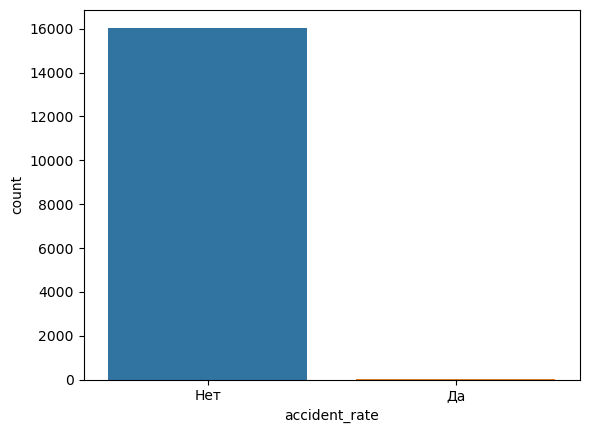

In [251]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

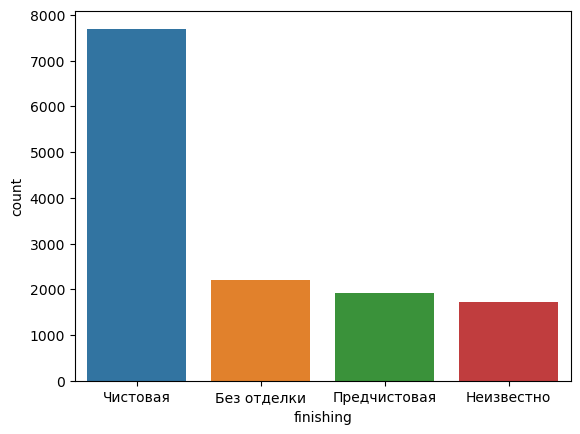

In [252]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

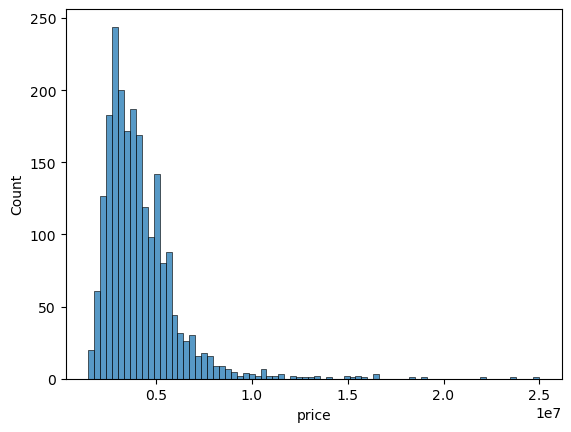

In [253]:
sns.histplot(data = df_domclick, x = 'price')

In [254]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

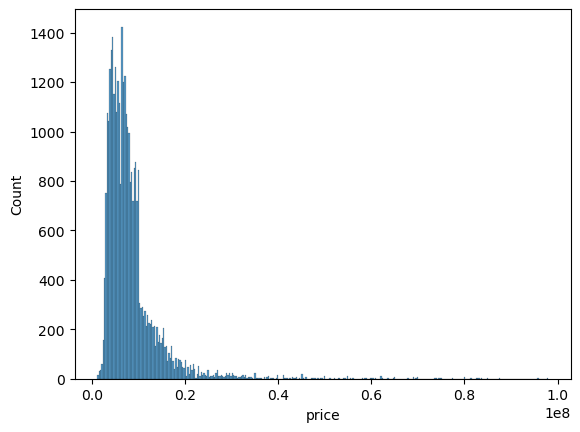

In [255]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

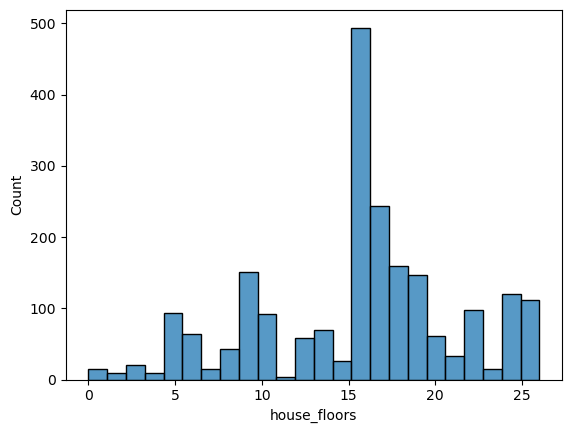

In [256]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

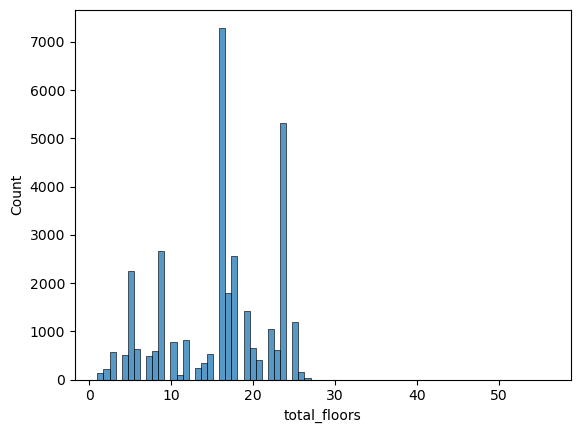

In [257]:
sns.histplot(data = df_cian, x = 'total_floors')

In [258]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

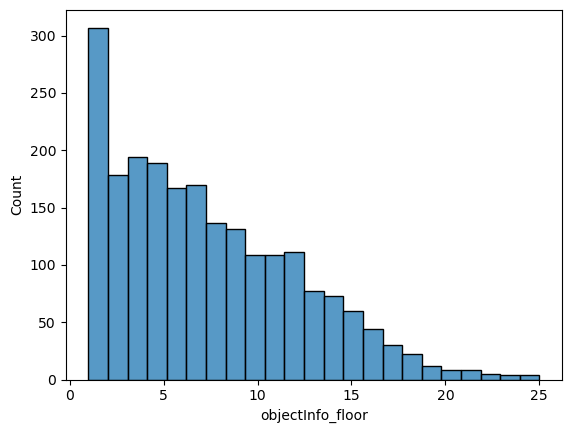

In [259]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

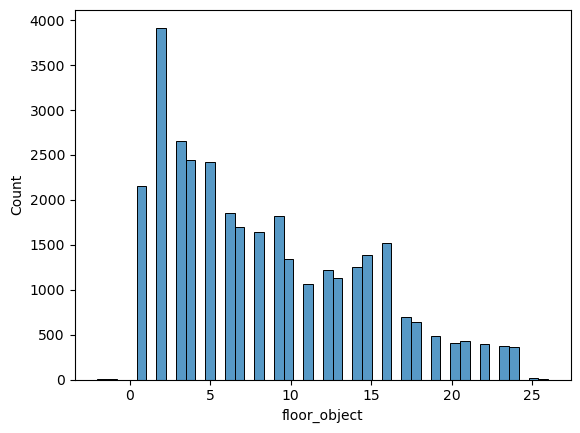

In [260]:
sns.histplot(data = df_cian, x = 'floor_object')

In [261]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
47,Апартаменты-студия,1600000,48485,-1,5,Вторичка Апартаменты,33.00000,20.0,8.0,2.7,1,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,False,NaN,NaN,"Краснодарский край, Краснодар, Прикубанский, у...",https://krasnodar.cian.ru/sale/flat/292147427/,0
50,Студия,1700000,49275,-1,6,Вторичка,34.50000,13.0,8.0,NaN,1,NaN,2,2012,NaN,1,0,3,2,Нет,True,NaN,NaN,"Краснодарский край, Краснодар, Прикубанский, м...",https://krasnodar.cian.ru/sale/flat/294440477/,0
53819,2-комн. квартира,6900000,108833,-2,19,Вторичка,63.40000,31.8,13.8,2.7,1,2,2,2021,NaN,NaN,0,1,3,Нет,False,NaN,2,"Краснодарский край, Краснодар, Прикубанский, у...",https://krasnodar.cian.ru/sale/flat/292672125/,2
55187,2-комн. квартира,7000000,104478,-2,16,Вторичка,67.00000,32.0,13.1,2.8,1,1,2,2021,NaN,3,0,2,3,Нет,False,NaN,2,"Краснодарский край, Краснодар, Карасунский, мк...",https://krasnodar.cian.ru/sale/flat/292050875/,2


<Axes: xlabel='objectInfo_area', ylabel='Count'>

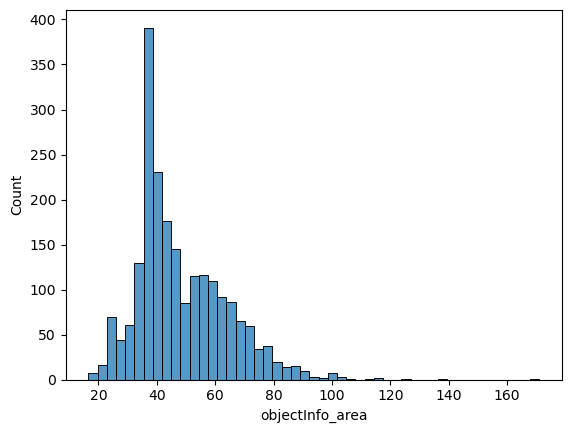

In [262]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

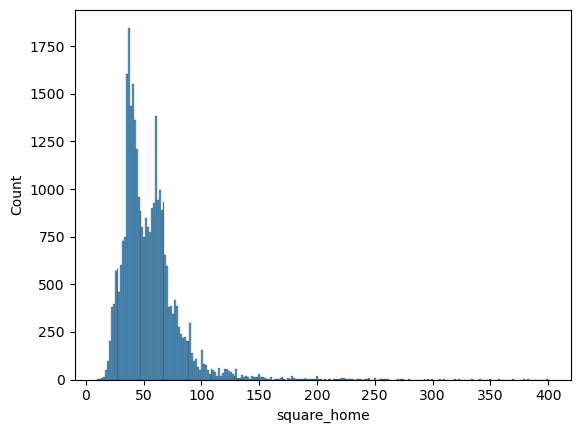

In [263]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

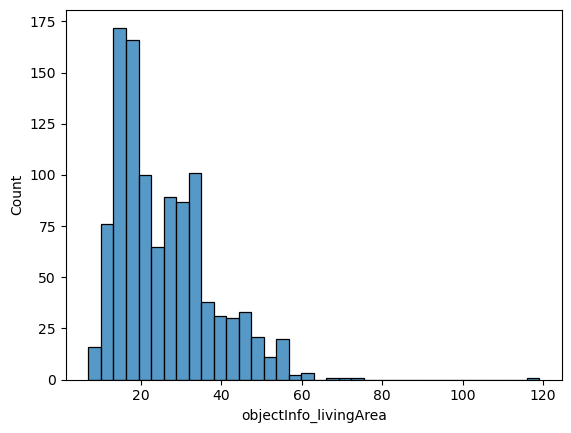

In [264]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

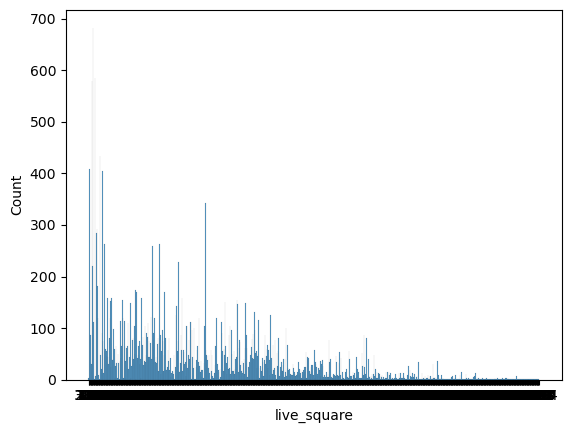

In [265]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

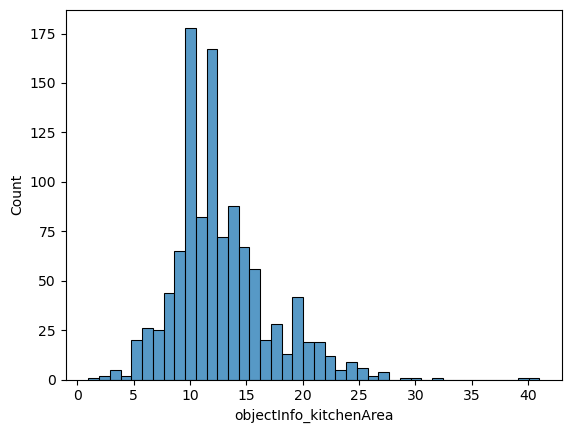

In [266]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

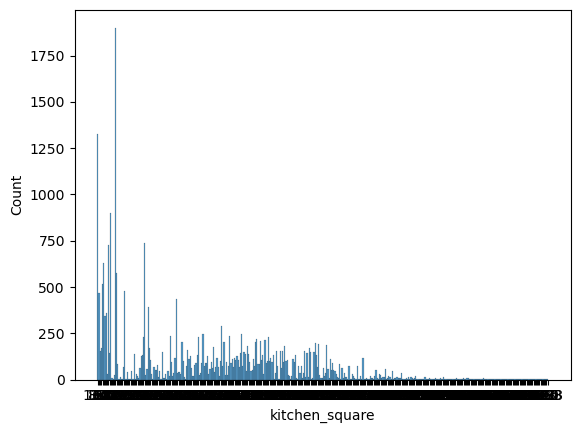

In [267]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

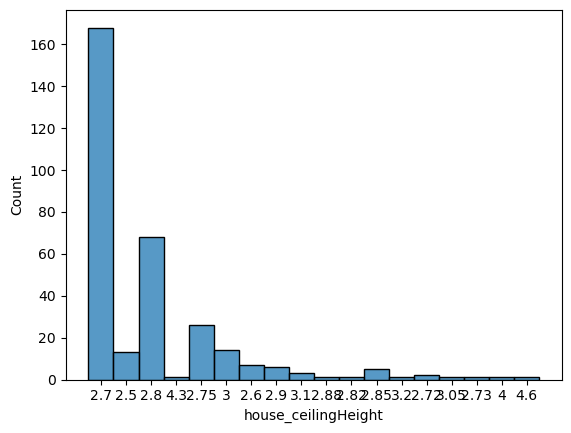

In [268]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

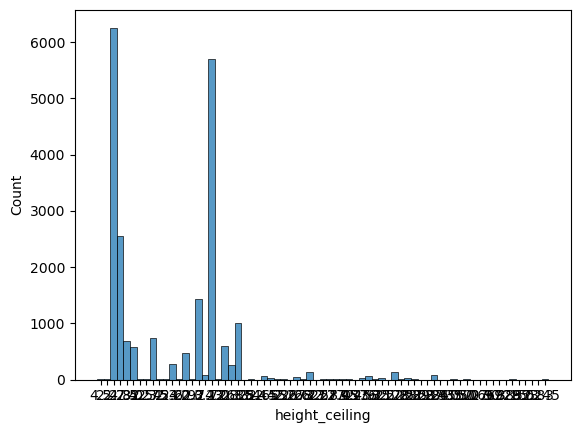

In [269]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

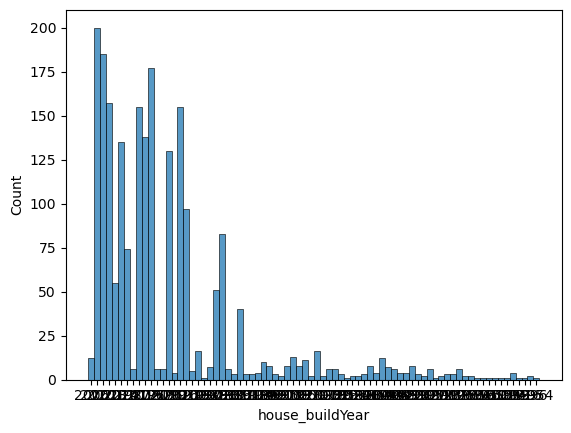

In [270]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

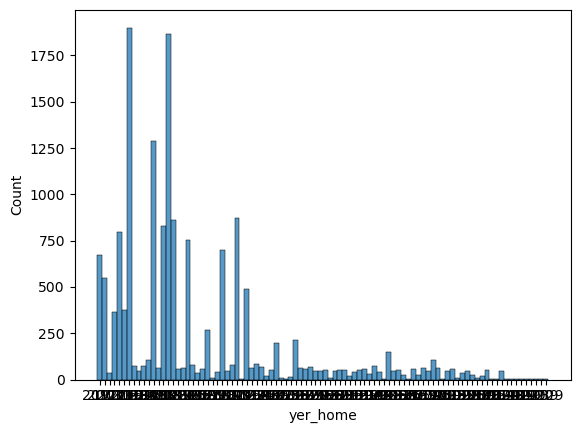

In [271]:
sns.histplot(data = df_cian, x = 'yer_home')

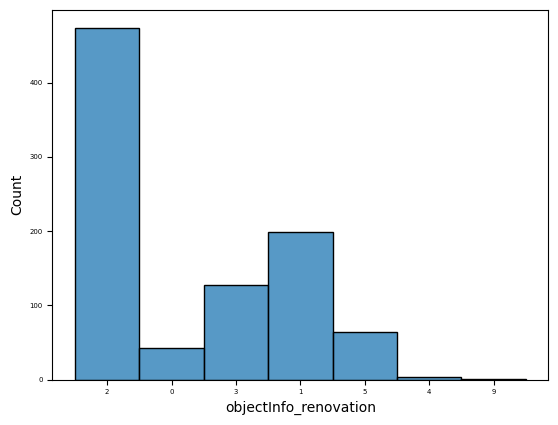

In [272]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [273]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '2', '0', '3', '1', '5', '4', '9'], dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

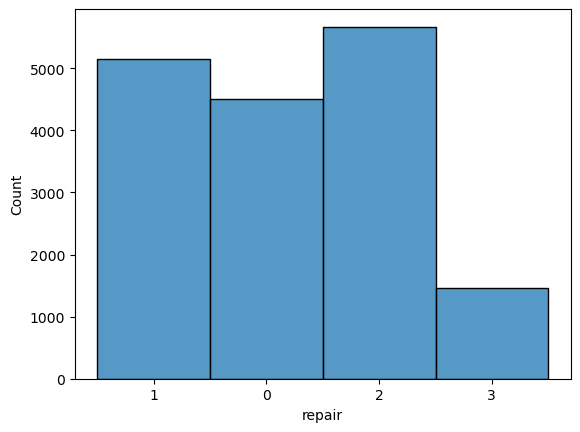

In [274]:
sns.histplot(data = df_cian, x = 'repair')

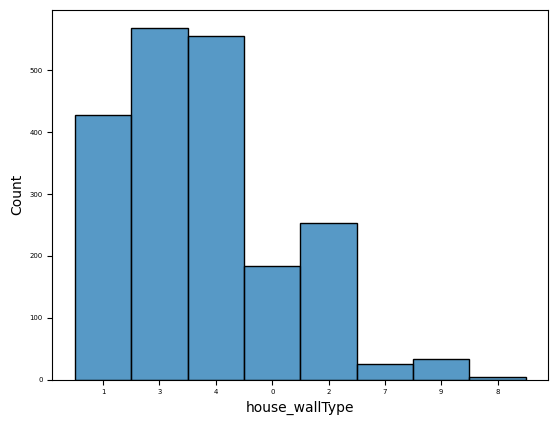

In [275]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [276]:
df_domclick['house_wallType'].unique()

array(['1', '3', '4', nan, '0', '2', '7', '9', '8'], dtype=object)

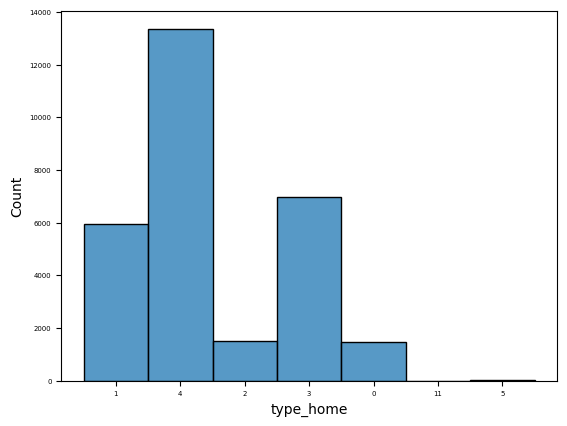

In [277]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [278]:
df_cian['type_home'].unique()

array(['1', '4', '2', nan, '3', '0', '11', '5'], dtype=object)

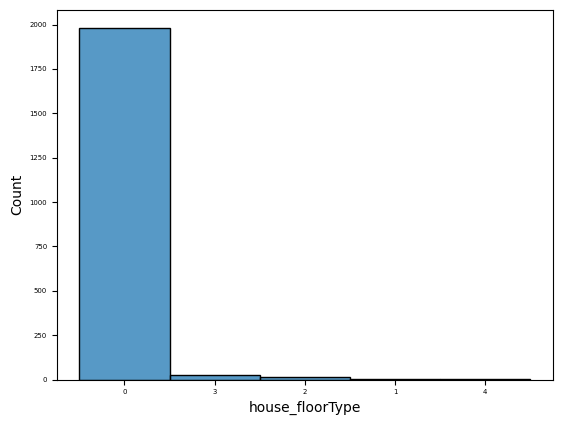

In [279]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [280]:
df_domclick['house_floorType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

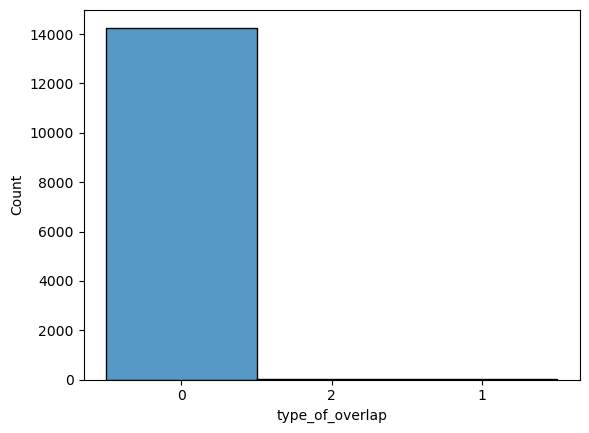

In [281]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

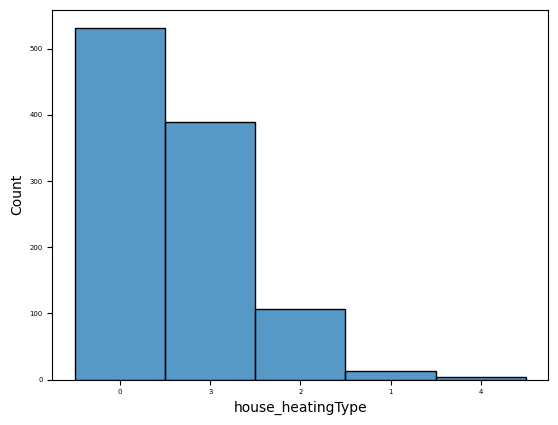

In [282]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [283]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '3', '2', '1', '4'], dtype=object)

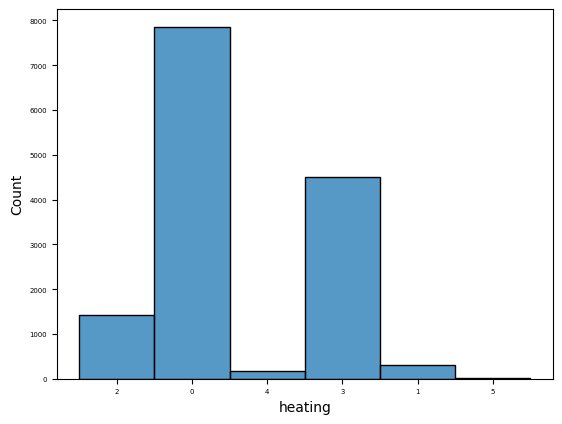

In [284]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [285]:
df_cian['heating'].unique()

array(['2', nan, '0', '4', '3', '1', '5'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

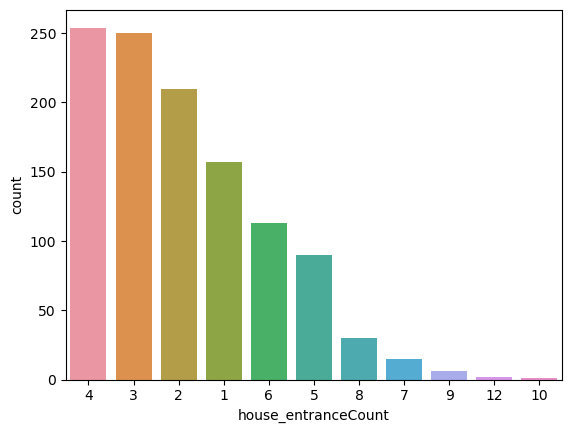

In [286]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

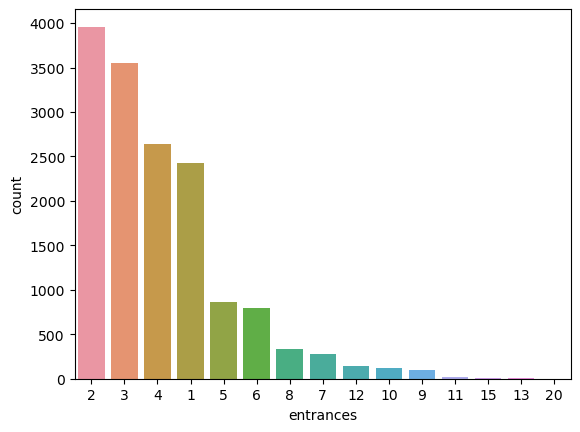

In [287]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

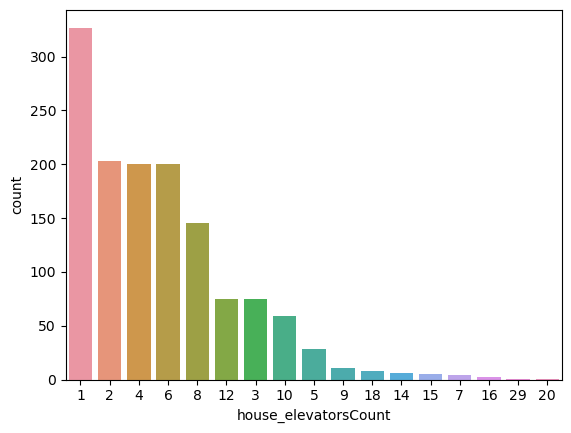

In [288]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

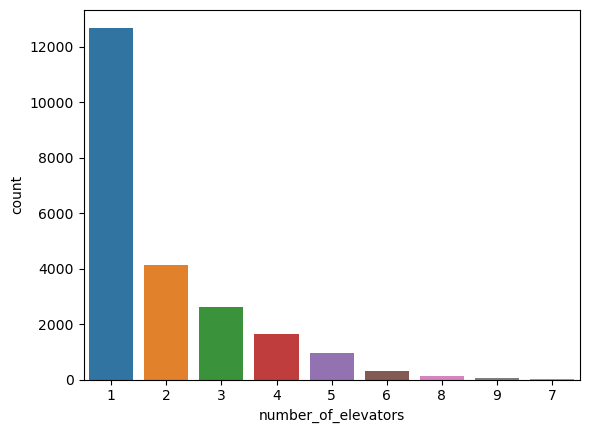

In [289]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [290]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2149 non-null   float64
 1   longitude                      2149 non-null   float64
 2   price                          2149 non-null   int64  
 3   house_floors                   2149 non-null   int64  
 4   house_buildYear                2118 non-null   object 
 5   house_ceilingHeight            320 non-null    object 
 6   house_hasGarbageDisposer       1242 non-null   object 
 7   house_liftsFreight             1186 non-null   float64
 8   house_liftsPassenger           1237 non-null   float64
 9   house_wallType                 2050 non-null   object 
 10  house_areaNonResidential       1081 non-null   object 
 11  house_basementArea             997 non-null    object 
 12  house_chuteCount               255 non-null    o

In [291]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2149 non-null   float64
 1   longitude                      2149 non-null   float64
 2   price                          2149 non-null   int64  
 3   house_floors                   2149 non-null   int64  
 4   house_buildYear                2118 non-null   object 
 5   house_ceilingHeight            320 non-null    object 
 6   house_hasGarbageDisposer       1242 non-null   float64
 7   house_liftsFreight             1186 non-null   float64
 8   house_liftsPassenger           1237 non-null   float64
 9   house_wallType                 2050 non-null   object 
 10  house_areaNonResidential       1081 non-null   object 
 11  house_basementArea             997 non-null    object 
 12  house_chuteCount               255 non-null    o

In [292]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [293]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2149 non-null   float64
 1   longitude                      2149 non-null   float64
 2   price                          2149 non-null   int64  
 3   house_floors                   2149 non-null   int64  
 4   house_buildYear                2118 non-null   float64
 5   house_ceilingHeight            320 non-null    float64
 6   house_hasGarbageDisposer       1242 non-null   float64
 7   house_liftsFreight             1186 non-null   float64
 8   house_liftsPassenger           1237 non-null   float64
 9   house_wallType                 2050 non-null   float64
 10  house_areaNonResidential       1081 non-null   float64
 11  house_basementArea             997 non-null    float64
 12  house_chuteCount               255 non-null    f

In [294]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33324 entries, 0 to 96651
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                33324 non-null  int64  
 1   price_for_metr       33324 non-null  int64  
 2   floor_object         33324 non-null  int64  
 3   total_floors         33324 non-null  int64  
 4   type_of_home         33324 non-null  object 
 5   square_home          33324 non-null  float64
 6   live_square          24361 non-null  object 
 7   kitchen_square       26821 non-null  object 
 8   height_ceiling       21413 non-null  object 
 9   bathroom             18512 non-null  object 
 10  balcony              15183 non-null  object 
 11  repair               16802 non-null  object 
 12  yer_home             15989 non-null  object 
 13  garbage_chute        2162 non-null   object 
 14  type_home            29267 non-null  object 
 15  type_of_overlap      14304 non-null  obje

In [295]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33324 entries, 0 to 96651
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                33324 non-null  int64  
 1   price_for_metr       33324 non-null  int64  
 2   floor_object         33324 non-null  int64  
 3   total_floors         33324 non-null  int64  
 4   type_of_home         33324 non-null  float64
 5   square_home          33324 non-null  float64
 6   live_square          24361 non-null  object 
 7   kitchen_square       26821 non-null  object 
 8   height_ceiling       21413 non-null  object 
 9   bathroom             18512 non-null  object 
 10  balcony              15183 non-null  object 
 11  repair               16802 non-null  object 
 12  yer_home             15989 non-null  object 
 13  garbage_chute        2162 non-null   float64
 14  type_home            29267 non-null  object 
 15  type_of_overlap      14304 non-null  obje

In [296]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [297]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 33324 entries, 0 to 96651
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                33324 non-null  int64  
 1   price_for_metr       33324 non-null  int64  
 2   floor_object         33324 non-null  int64  
 3   total_floors         33324 non-null  int64  
 4   type_of_home         33324 non-null  float64
 5   square_home          33324 non-null  float64
 6   live_square          24361 non-null  float64
 7   kitchen_square       26821 non-null  float64
 8   height_ceiling       21413 non-null  float64
 9   bathroom             18512 non-null  float64
 10  balcony              15183 non-null  float64
 11  repair               16802 non-null  float64
 12  yer_home             15989 non-null  float64
 13  garbage_chute        2162 non-null   float64
 14  type_home            29267 non-null  float64
 15  type_of_overlap      14304 non-null  floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1150000,85185,1,6,0.00000,13.50000,8.50000,NaN,NaN,1.00000,NaN,1.00000,2012.00000,0.00000,1.00000,0.00000,3.00000,2.00000,1.00000,NaN,NaN,0
1,1200000,21700,2,5,0.00000,55.30000,30.00000,12.00000,NaN,1.00000,NaN,0.00000,NaN,NaN,4.00000,NaN,NaN,NaN,0.00000,NaN,NaN,2
3,1300000,56522,1,6,0.00000,23.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,2013.00000,NaN,1.00000,0.00000,4.00000,0.00000,0.00000,NaN,NaN,0
4,1200000,34286,1,1,0.00000,35.00000,22.00000,8.00000,NaN,NaN,NaN,0.00000,NaN,NaN,1.00000,NaN,NaN,NaN,0.00000,NaN,NaN,2
5,1300000,65657,2,2,0.00000,19.80000,13.10000,3.00000,4.50000,NaN,NaN,1.00000,1917.00000,NaN,1.00000,0.00000,1.00000,4.00000,1.00000,NaN,NaN,1


In [298]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2149 non-null   float64
 1   longitude                      2149 non-null   float64
 2   price                          2149 non-null   int64  
 3   house_floors                   2149 non-null   int64  
 4   house_buildYear                2118 non-null   float64
 5   house_ceilingHeight            320 non-null    float64
 6   house_hasGarbageDisposer       1242 non-null   float64
 7   house_liftsFreight             1186 non-null   float64
 8   house_liftsPassenger           1237 non-null   float64
 9   house_wallType                 2050 non-null   float64
 10  house_areaNonResidential       1081 non-null   float64
 11  house_basementArea             997 non-null    float64
 12  house_chuteCount               255 non-null    f

# Соединение датасетов

In [299]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [300]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [301]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array([nan, '0', '1', '2'], dtype=object)

In [302]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

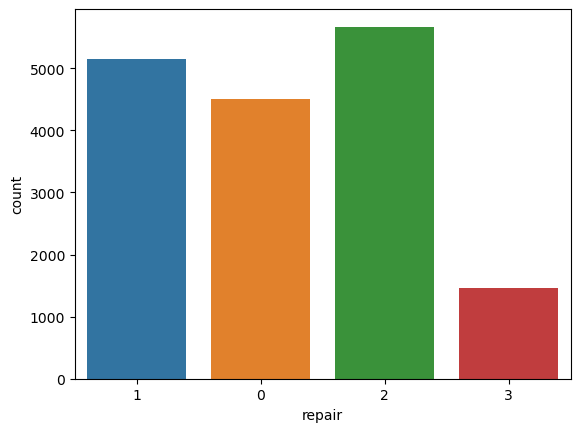

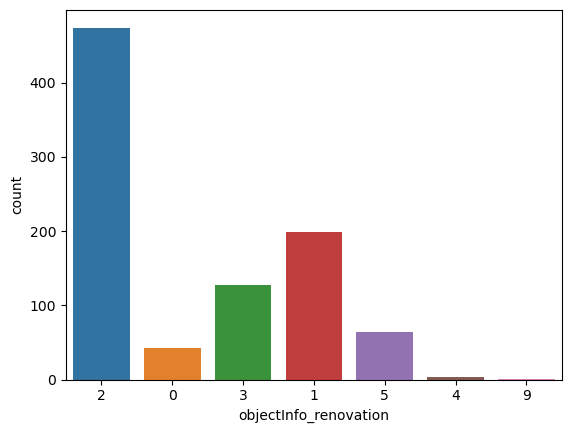

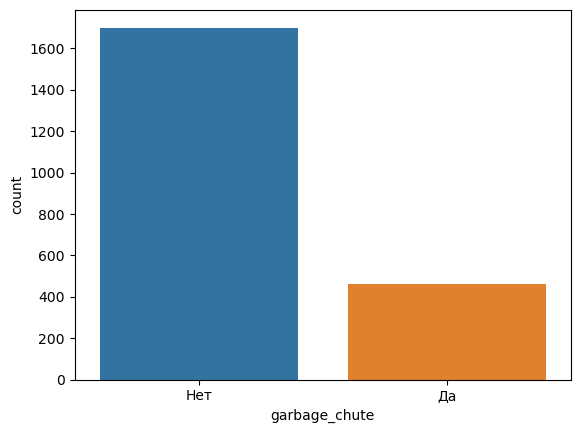

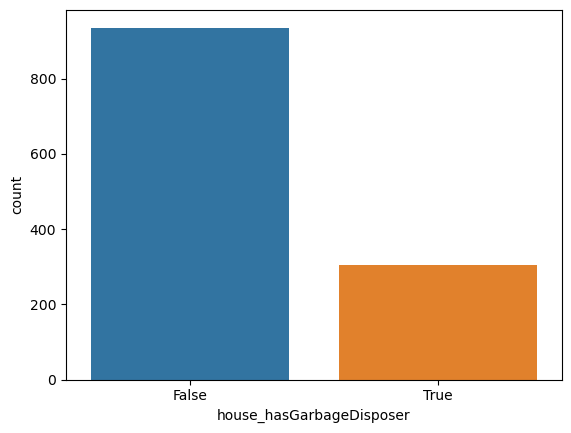

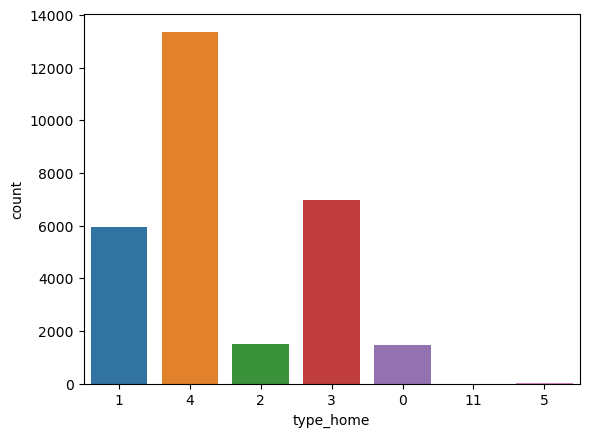

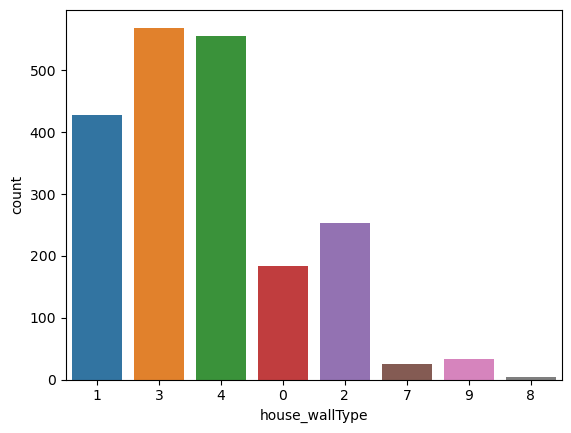

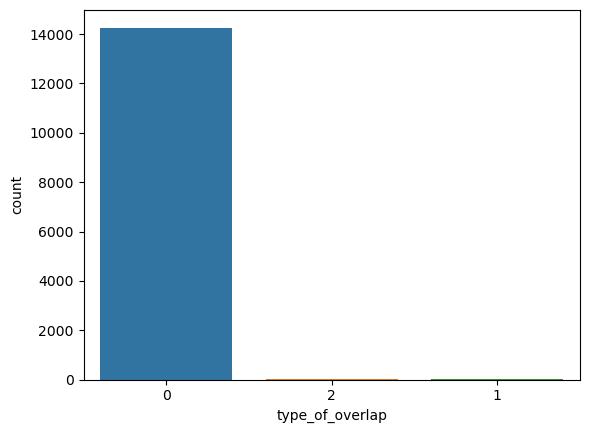

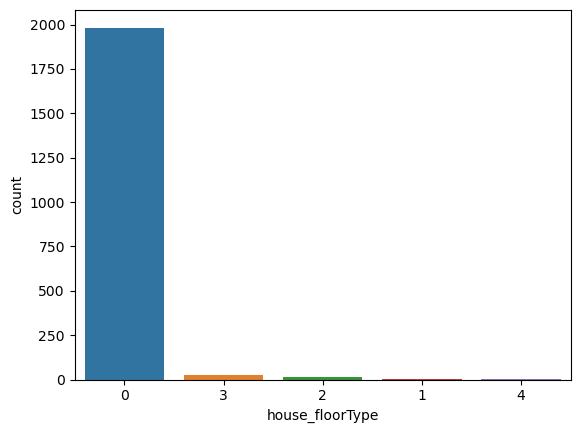

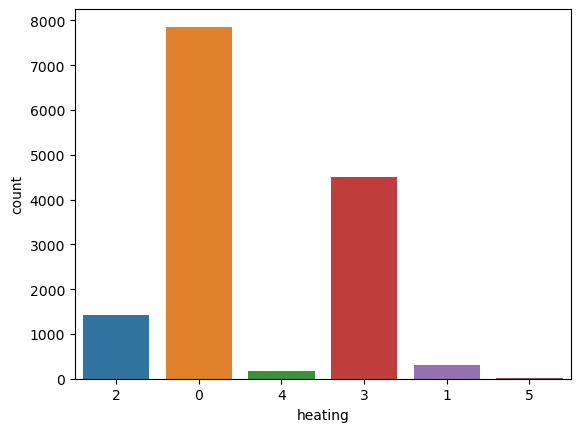

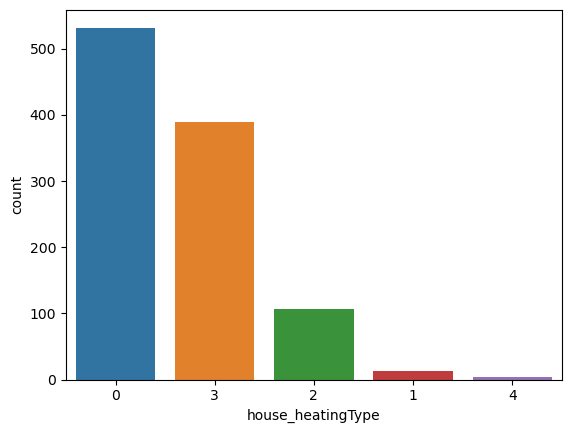

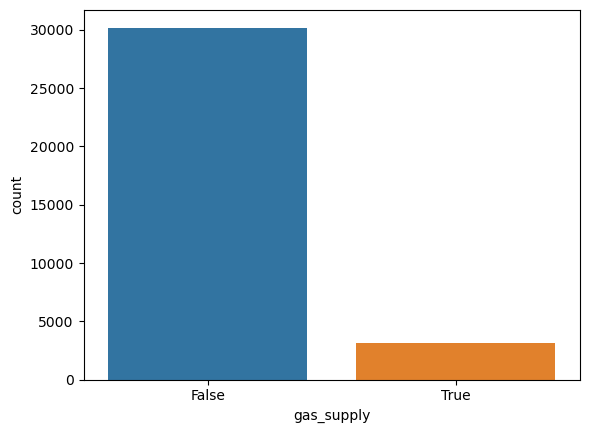

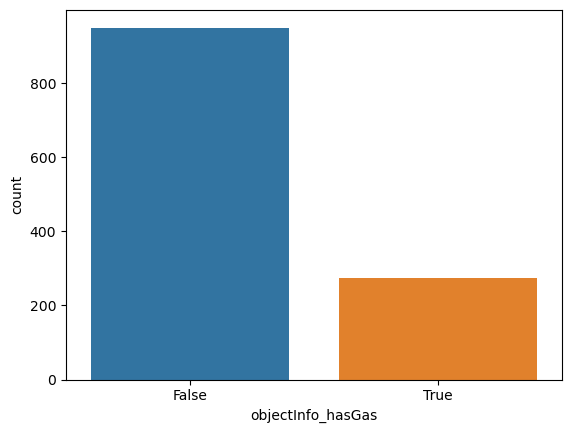

<Figure size 640x480 with 0 Axes>

In [303]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [304]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [305]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [306]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2149 non-null   int64  
 1   room_count       2149 non-null   int64  
 2   floor            2149 non-null   int64  
 3   totalFloors      2149 non-null   int64  
 4   area             2149 non-null   float64
 5   kitchenArea      1084 non-null   float64
 6   livingArea       1065 non-null   float64
 7   ceilingHeight    320 non-null    float64
 8   bathroomCount    398 non-null    float64
 9   balconyCount     2149 non-null   int64  
 10  repairType       911 non-null    float64
 11  buildYear        2118 non-null   float64
 12  hasGarbageChute  1242 non-null   float64
 13  wallType         2050 non-null   float64
 14  floorType        2026 non-null   float64
 15  entranceCount    1128 non-null   float64
 16  heatingType      1045 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,2990000,1,3,5,30.00000,NaN,NaN,NaN,NaN,0,NaN,2006.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,NaN
1,5100000,1,3,17,46.00000,12.00000,NaN,NaN,0.00000,0,2.00000,2020.00000,0.00000,3.00000,0.00000,NaN,NaN,0.00000,NaN
2,8350000,2,23,25,61.70000,13.60000,NaN,NaN,0.00000,2,0.00000,2022.00000,0.00000,4.00000,0.00000,NaN,NaN,0.00000,NaN
3,2300000,2,9,17,40.00000,14.00000,24.00000,NaN,NaN,1,NaN,2022.00000,0.00000,3.00000,0.00000,NaN,NaN,NaN,NaN
4,3350000,2,4,9,68.00000,25.20000,34.00000,NaN,0.00000,1,2.00000,2018.00000,0.00000,NaN,0.00000,NaN,NaN,0.00000,NaN


In [307]:
merge_domclick['repairType'].unique()

array([nan,  2.,  0.,  3.,  1.,  5.,  4.,  9.])

In [308]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33324 entries, 0 to 33323
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            33324 non-null  int64  
 1   room_count       33324 non-null  int64  
 2   floor            33324 non-null  int64  
 3   totalFloors      33324 non-null  int64  
 4   area             33324 non-null  float64
 5   kitchenArea      26821 non-null  float64
 6   livingArea       24361 non-null  float64
 7   ceilingHeight    21413 non-null  float64
 8   bathroomCount    18512 non-null  float64
 9   balconyCount     15183 non-null  float64
 10  repairType       16802 non-null  float64
 11  buildYear        15989 non-null  float64
 12  hasGarbageChute  2162 non-null   float64
 13  wallType         29267 non-null  float64
 14  floorType        14304 non-null  float64
 15  entranceCount    15237 non-null  float64
 16  heatingType      14268 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1150000,0,1,6,13.50000,NaN,8.50000,NaN,1.00000,NaN,1.00000,2012.00000,0.00000,1.00000,0.00000,3.00000,2.00000,1.00000,NaN
1,1200000,2,2,5,55.30000,12.00000,30.00000,NaN,1.00000,NaN,0.00000,NaN,NaN,4.00000,NaN,NaN,NaN,0.00000,NaN
2,1300000,0,1,6,23.00000,NaN,NaN,NaN,1.00000,NaN,1.00000,2013.00000,NaN,1.00000,0.00000,4.00000,0.00000,0.00000,NaN
3,1200000,2,1,1,35.00000,8.00000,22.00000,NaN,NaN,NaN,0.00000,NaN,NaN,1.00000,NaN,NaN,NaN,0.00000,NaN
4,1300000,1,2,2,19.80000,3.00000,13.10000,4.50000,NaN,NaN,1.00000,1917.00000,NaN,1.00000,0.00000,1.00000,4.00000,1.00000,NaN


In [309]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [310]:
df_combined = df_combined.drop_duplicates()

In [311]:
df_combined.reset_index(drop = True, inplace=True)

In [312]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31476 entries, 0 to 31475
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            31476 non-null  int64  
 1   room_count       31476 non-null  int64  
 2   floor            31476 non-null  int64  
 3   totalFloors      31476 non-null  int64  
 4   area             31476 non-null  float64
 5   kitchenArea      24883 non-null  float64
 6   livingArea       22045 non-null  float64
 7   ceilingHeight    18051 non-null  float64
 8   bathroomCount    18458 non-null  float64
 9   balconyCount     17312 non-null  float64
 10  repairType       17701 non-null  float64
 11  buildYear        18093 non-null  float64
 12  hasGarbageChute  3399 non-null   float64
 13  wallType         27325 non-null  float64
 14  floorType        16317 non-null  float64
 15  entranceCount    16352 non-null  float64
 16  heatingType      15300 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,2990000,1,3,5,30.00000,NaN,NaN,NaN,NaN,0.00000,NaN,2006.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,NaN
1,5100000,1,3,17,46.00000,12.00000,NaN,NaN,0.00000,0.00000,2.00000,2020.00000,0.00000,3.00000,0.00000,NaN,NaN,0.00000,NaN
2,8350000,2,23,25,61.70000,13.60000,NaN,NaN,0.00000,2.00000,0.00000,2022.00000,0.00000,4.00000,0.00000,NaN,NaN,0.00000,NaN
3,2300000,2,9,17,40.00000,14.00000,24.00000,NaN,NaN,1.00000,NaN,2022.00000,0.00000,3.00000,0.00000,NaN,NaN,NaN,NaN
4,3350000,2,4,9,68.00000,25.20000,34.00000,NaN,0.00000,1.00000,2.00000,2018.00000,0.00000,NaN,0.00000,NaN,NaN,0.00000,NaN


<Axes: xlabel='price', ylabel='Count'>

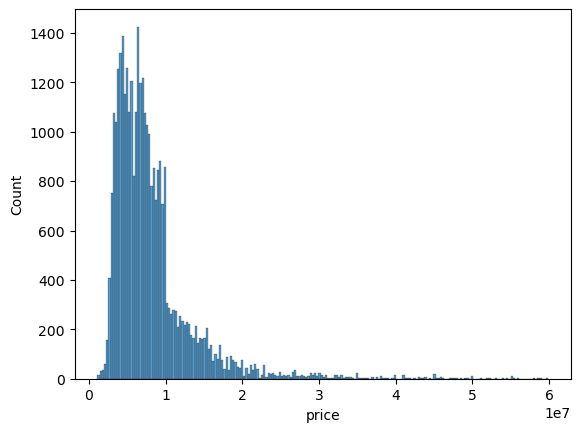

In [313]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

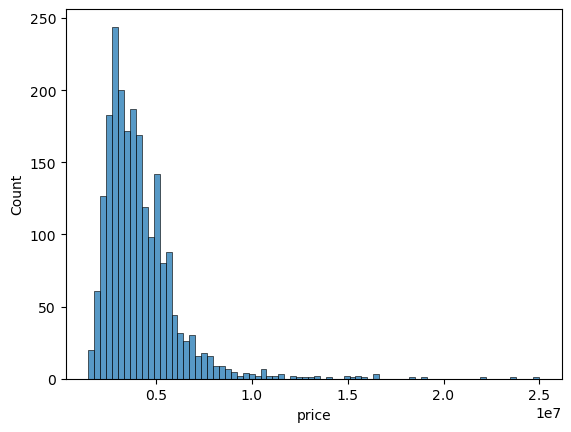

In [314]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

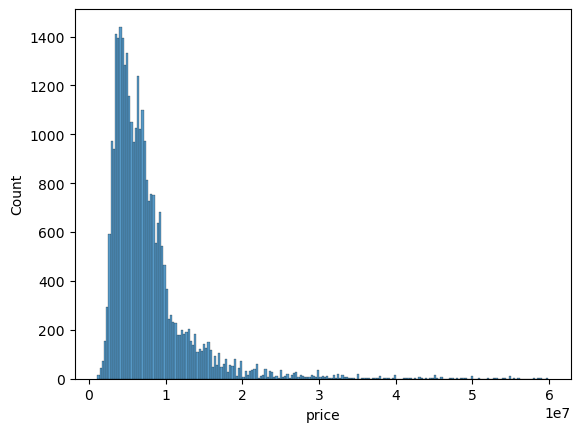

In [315]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

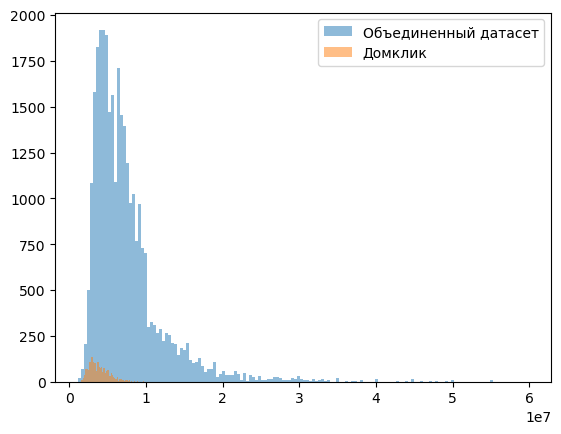

In [316]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

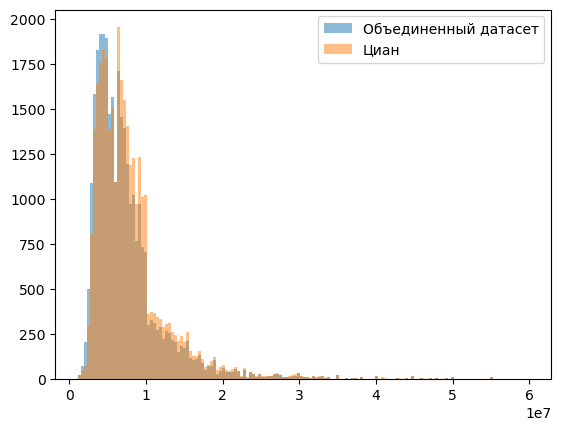

In [317]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

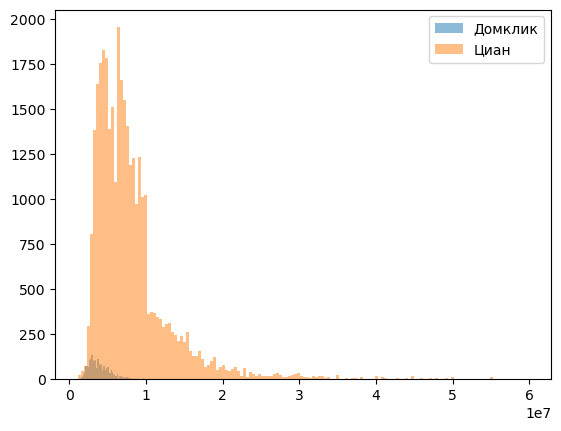

In [318]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [319]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [320]:
df_domclick_prepared['price'].describe()

count       2149.00000
mean     4163586.55933
std      2015198.83704
min      1470000.00000
25%      2910000.00000
50%      3730000.00000
75%      4930000.00000
max     25000000.00000
Name: price, dtype: float64

In [321]:
df_cian_prepared['price'].describe()

count      33324.00000
mean     8221153.63423
std      6094421.21329
min      1100000.00000
25%      4749345.00000
50%      6842160.00000
75%      9400000.00000
max     98000000.00000
Name: price, dtype: float64

In [322]:
df_combined['price'].describe()

count      31476.00000
mean     7735320.15208
std      6117945.56062
min      1100000.00000
25%      4380000.00000
50%      6300000.00000
75%      8900000.00000
max     98000000.00000
Name: price, dtype: float64

In [323]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [324]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_8384\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


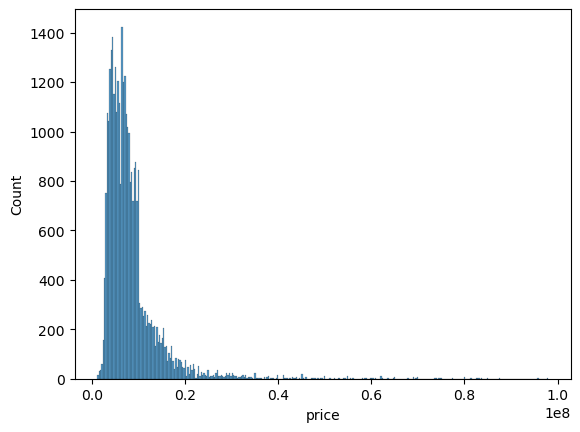

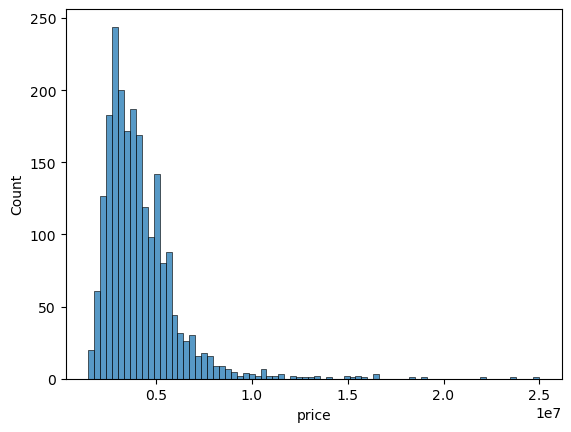

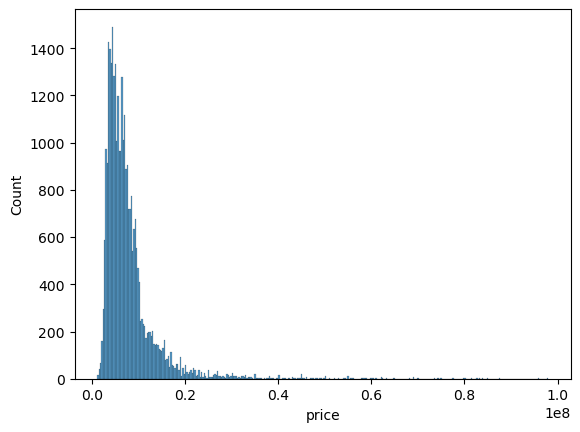

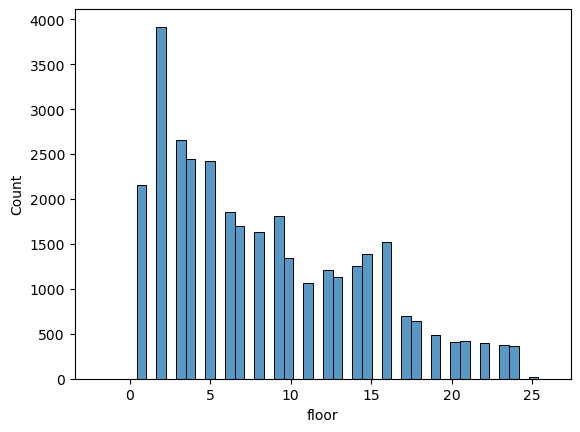

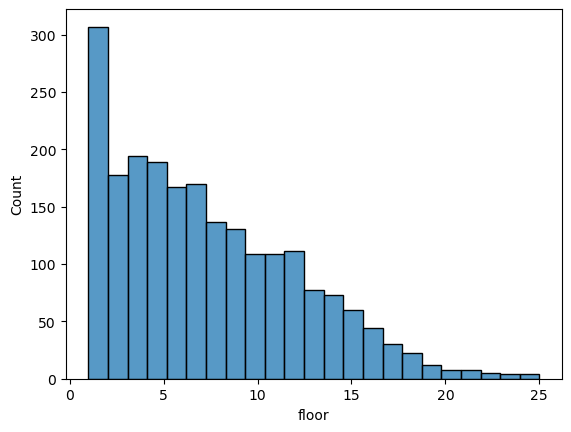

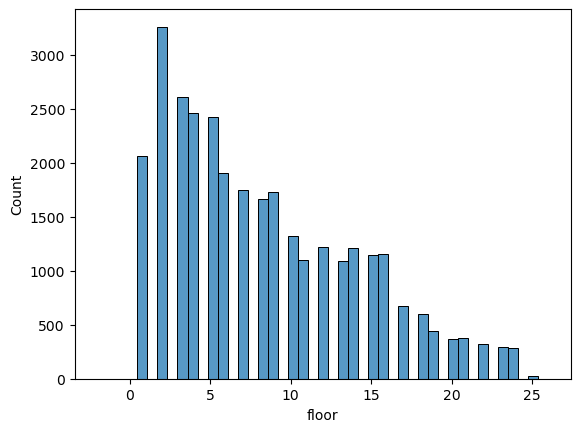

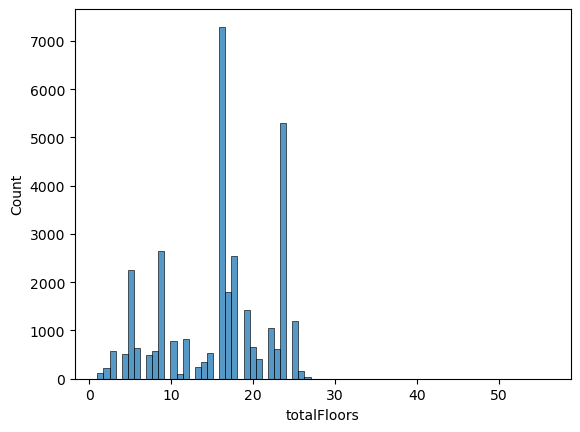

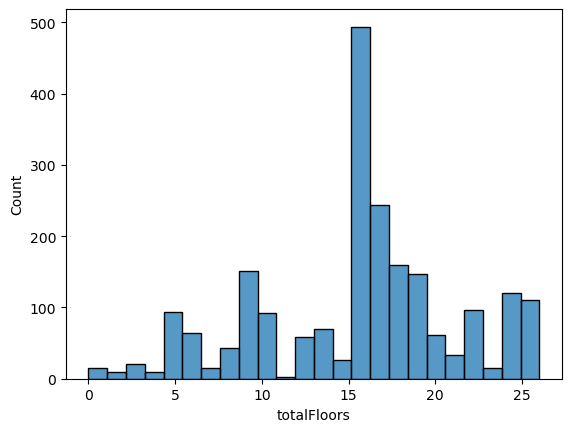

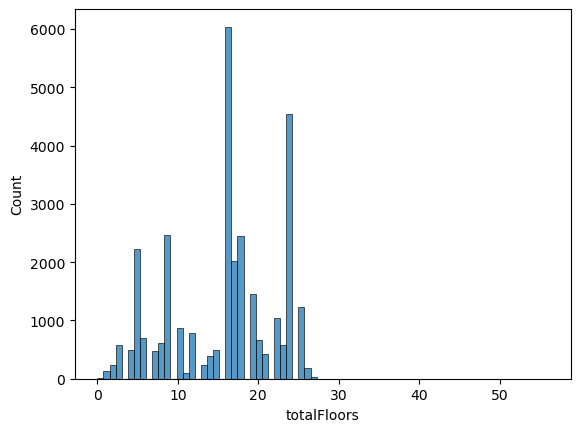

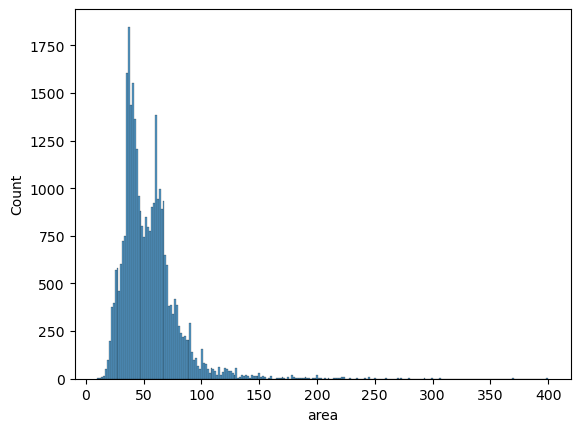

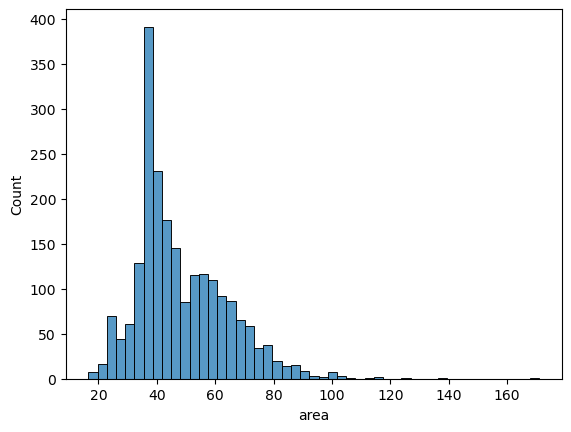

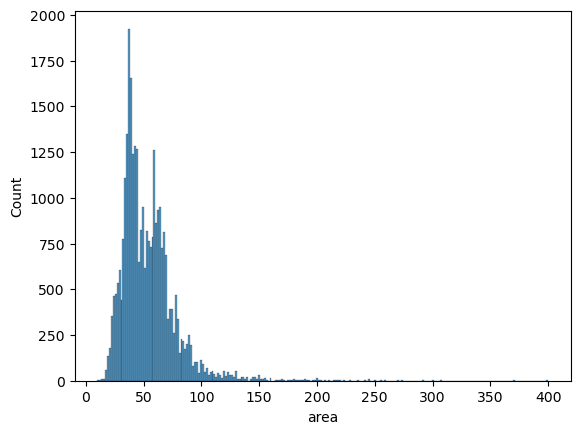

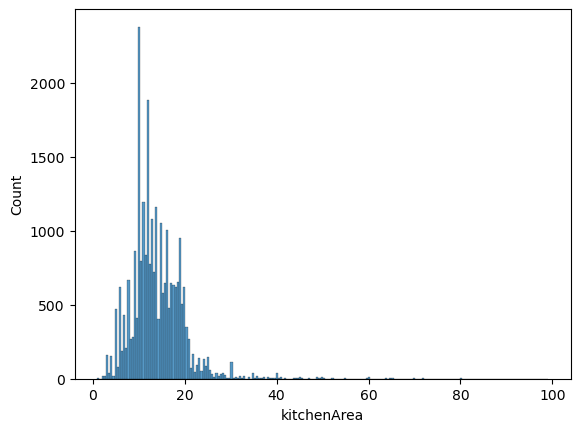

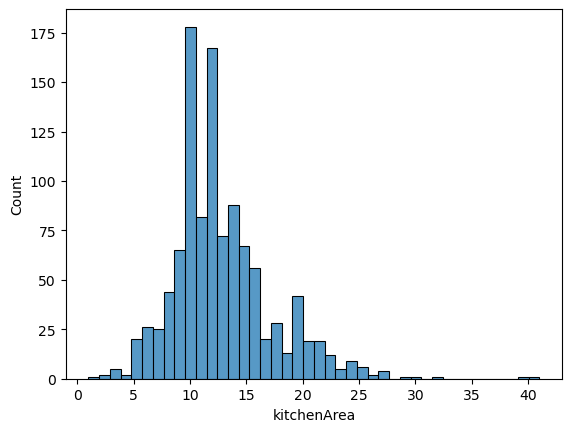

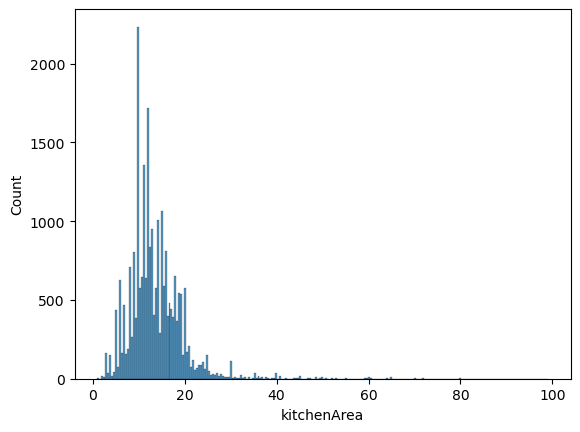

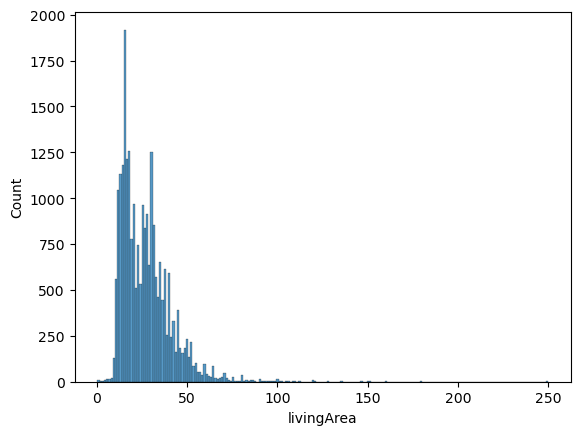

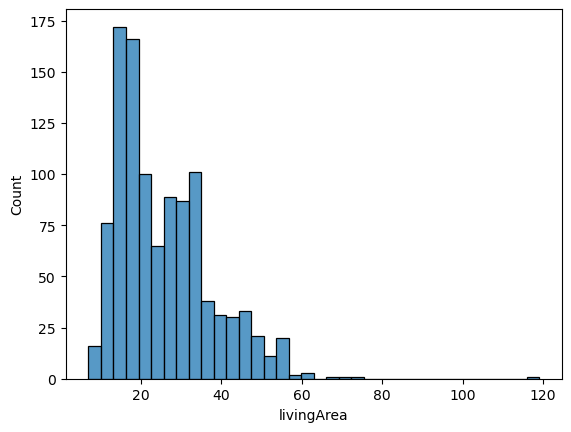

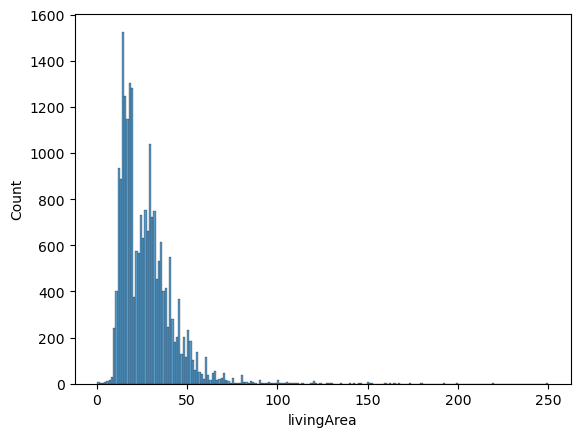

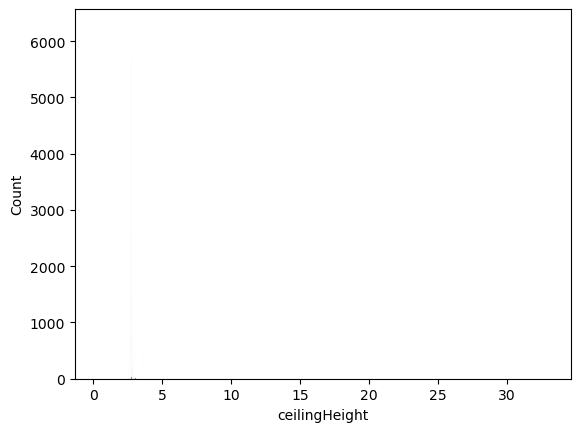

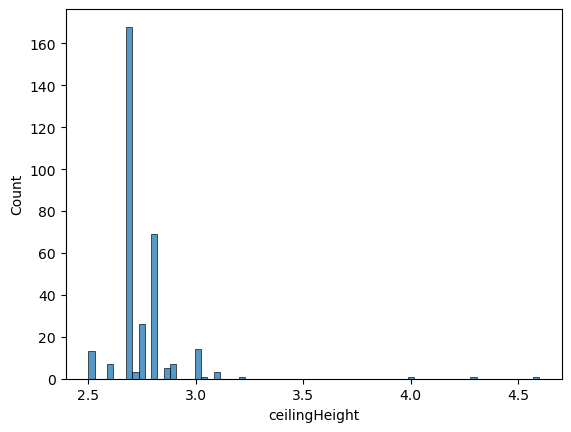

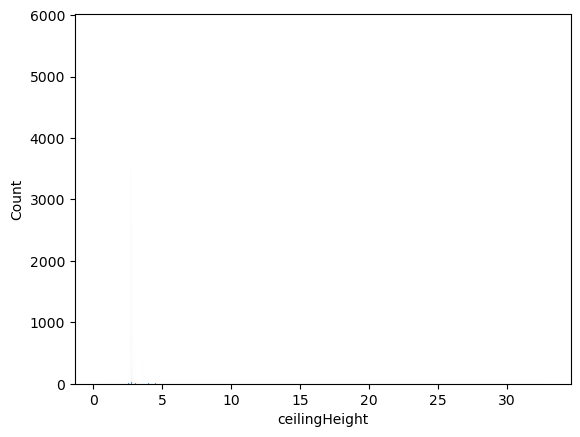

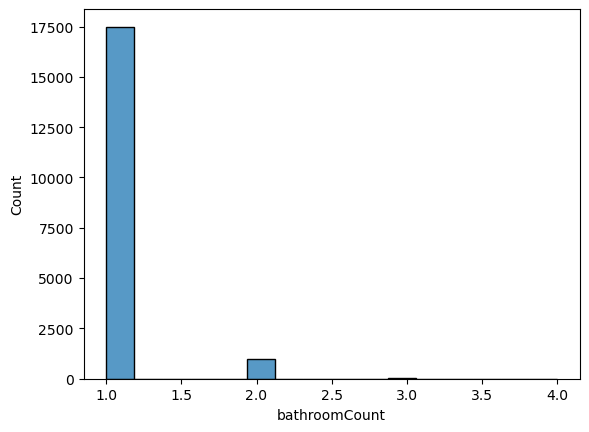

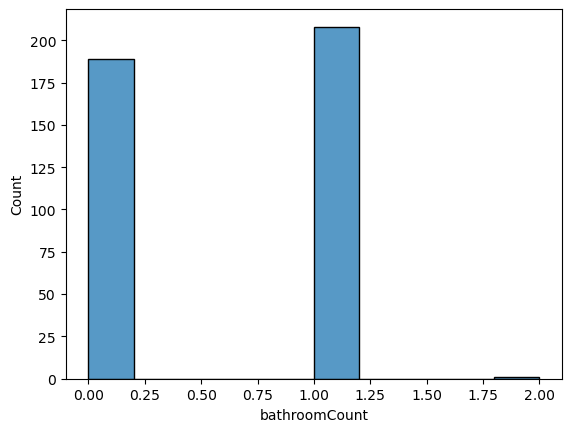

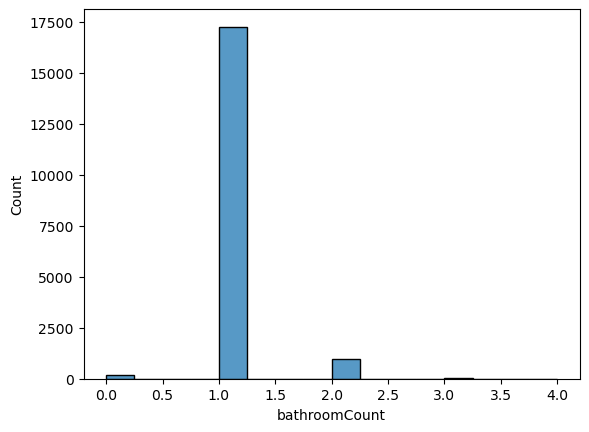

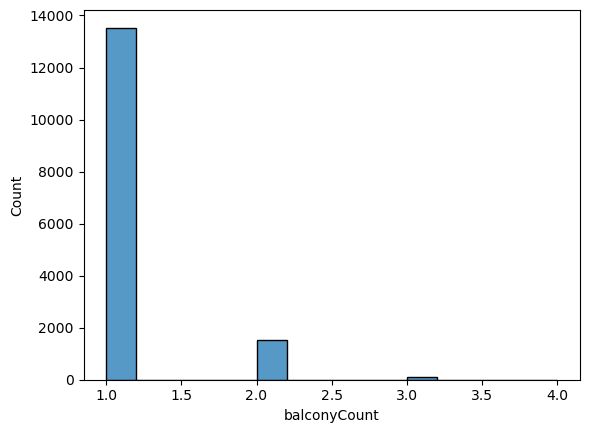

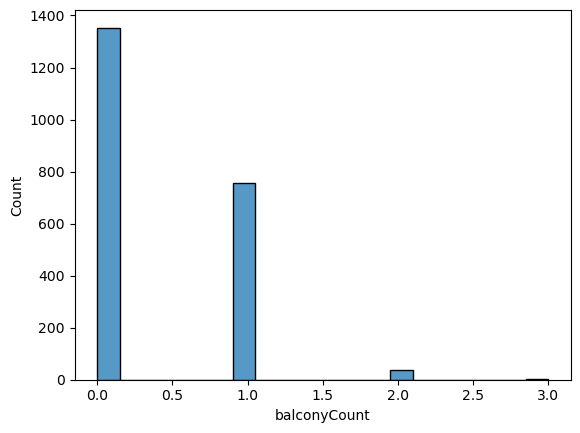

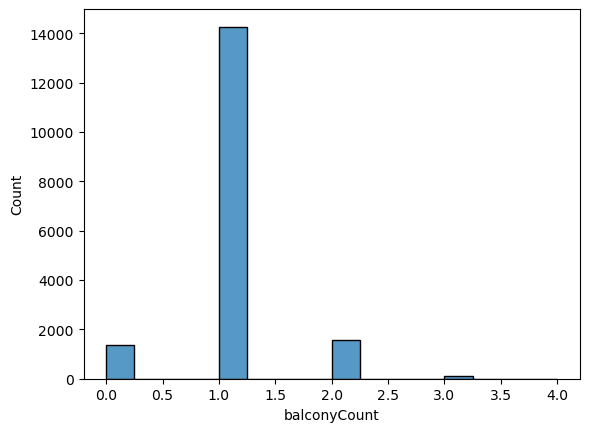

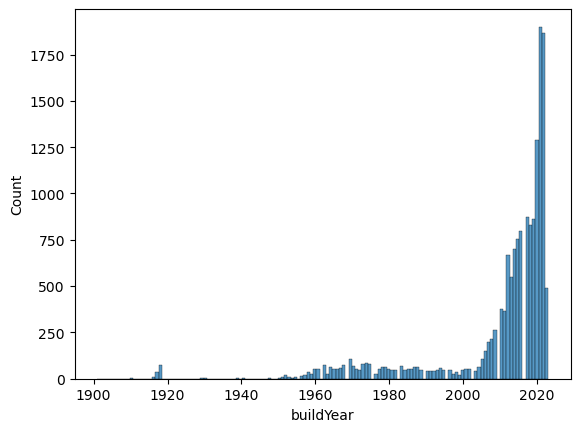

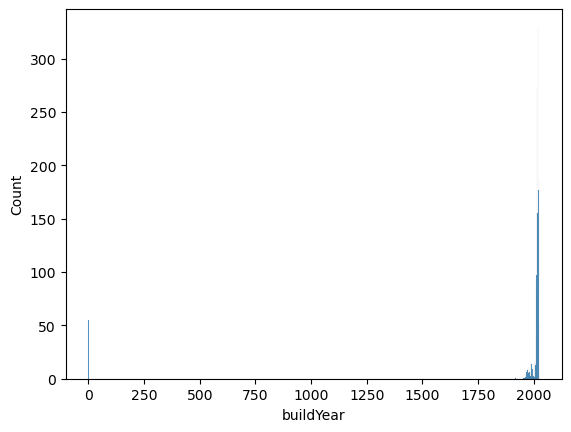

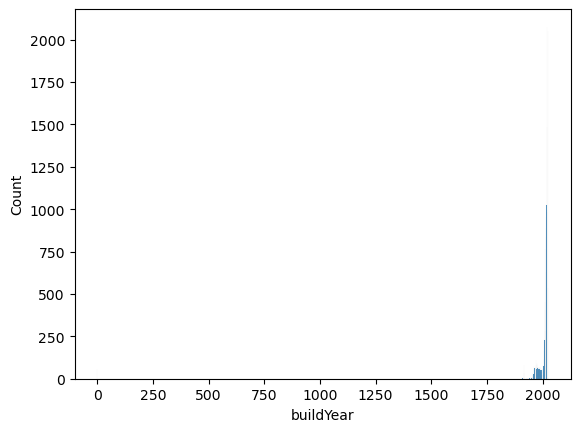

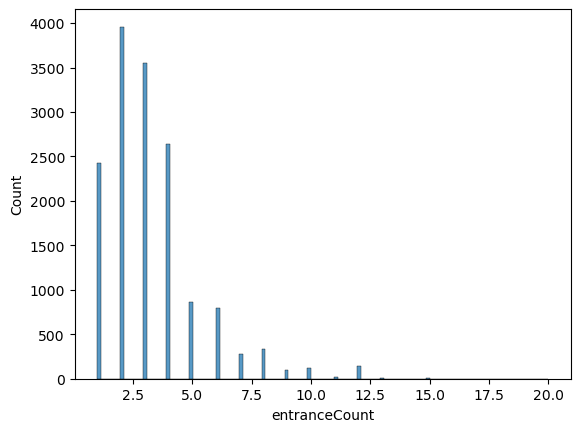

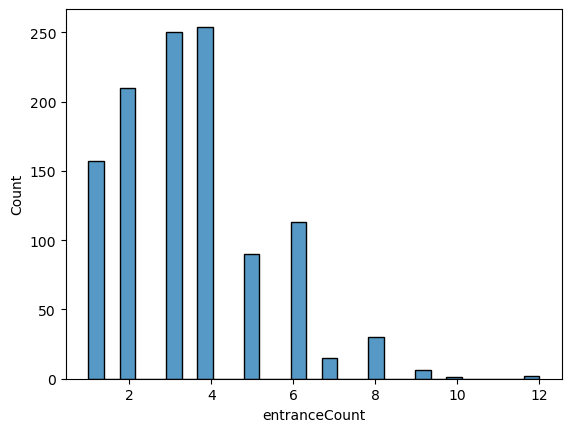

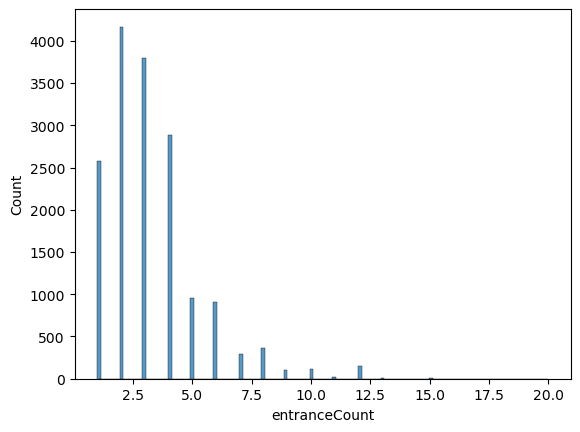

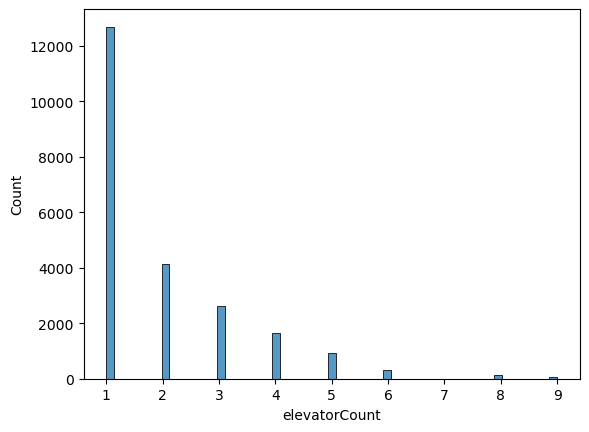

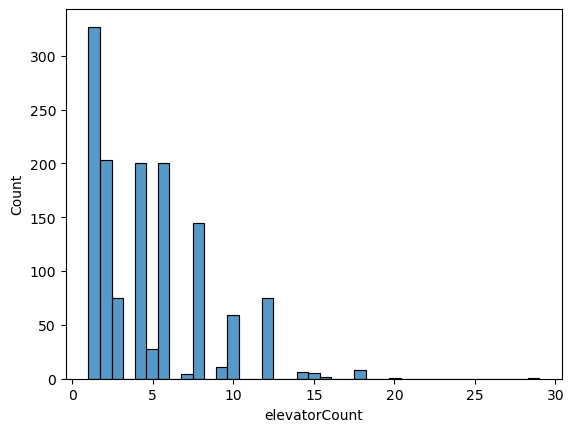

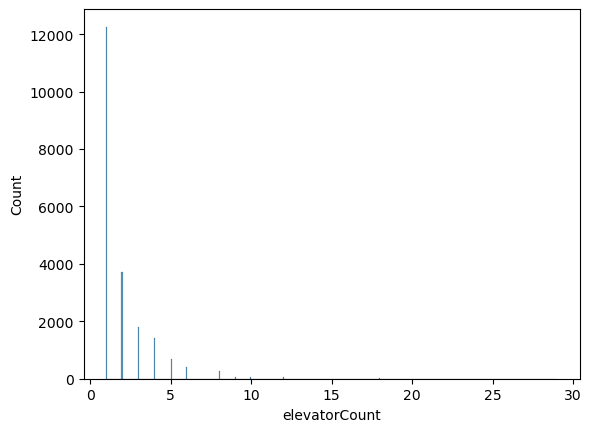

<Figure size 640x480 with 0 Axes>

In [325]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

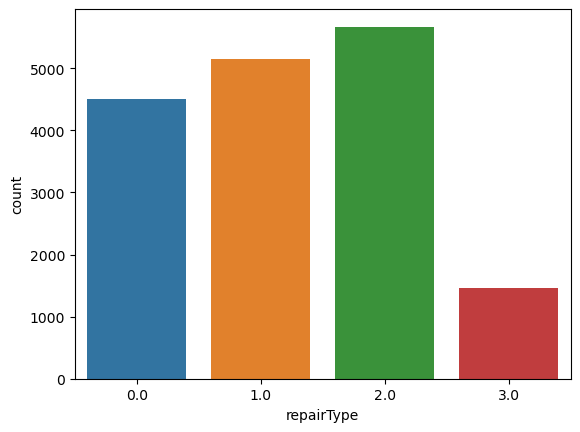

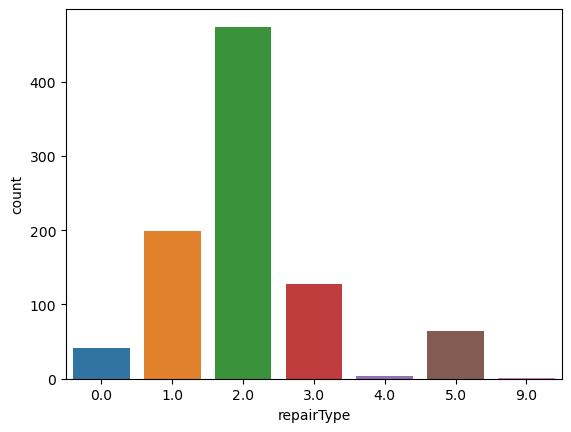

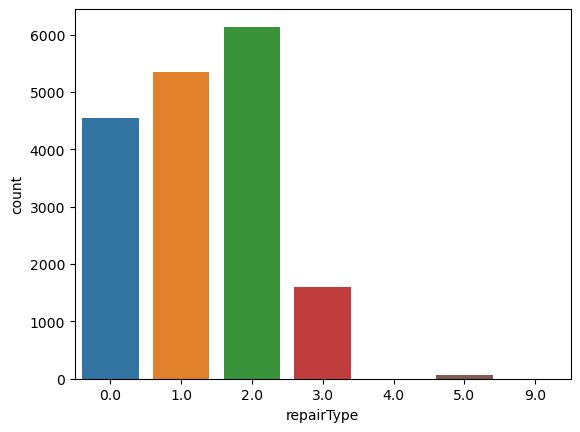

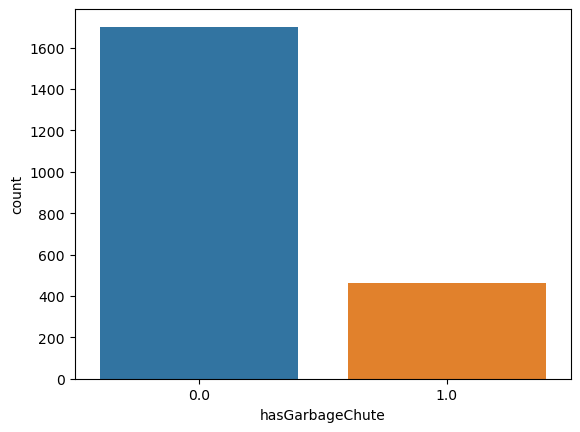

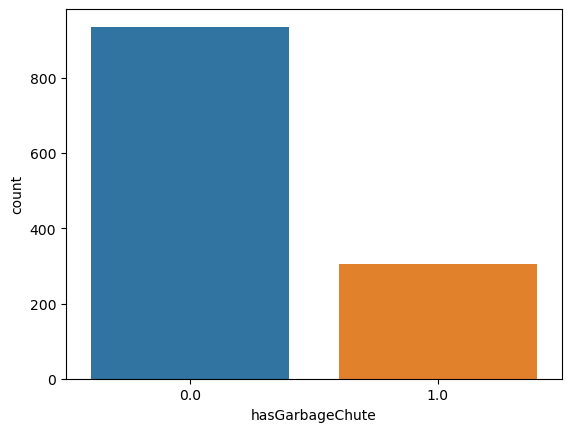

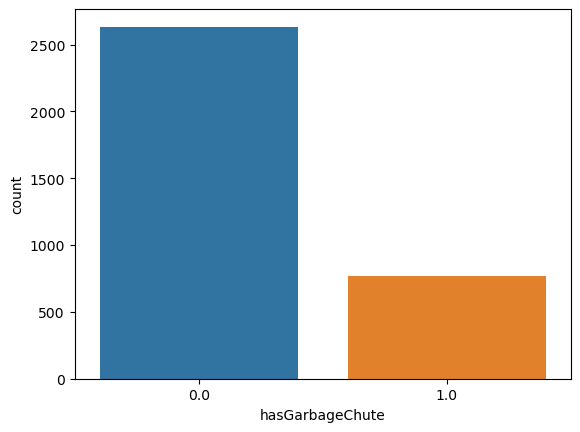

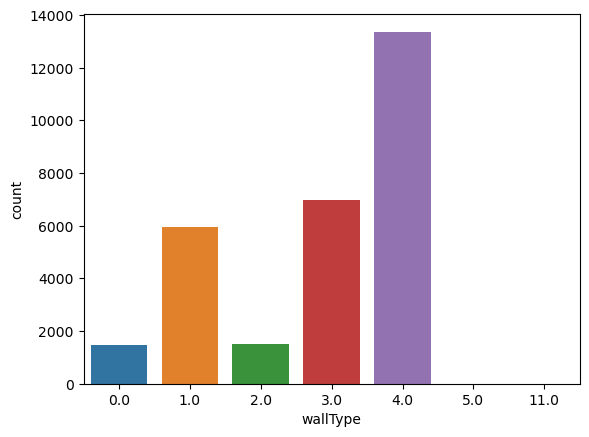

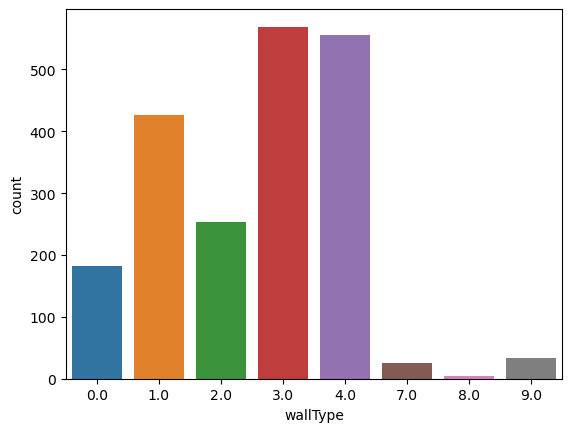

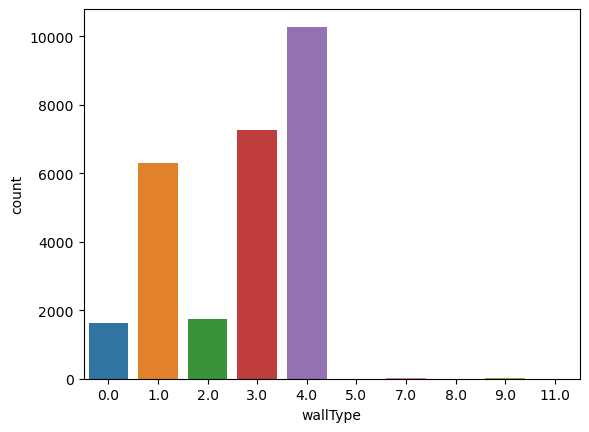

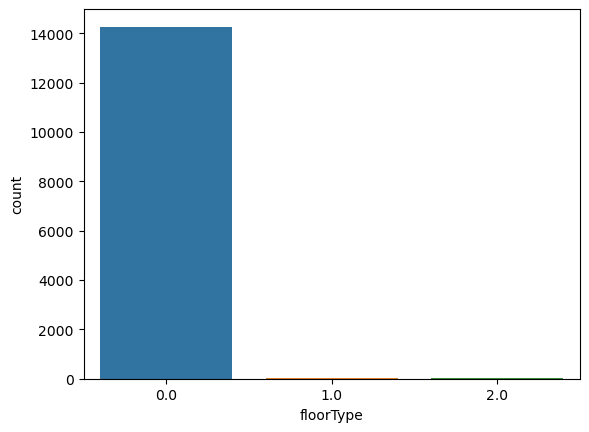

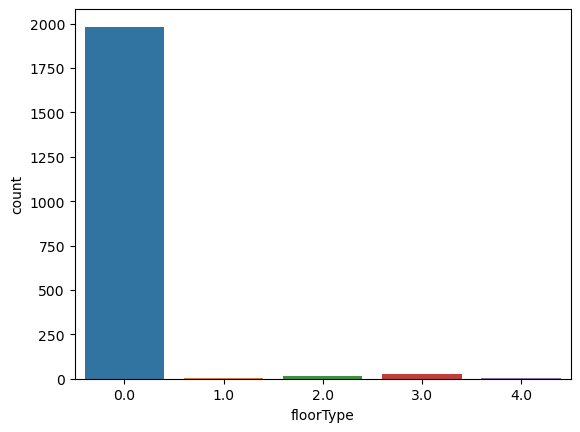

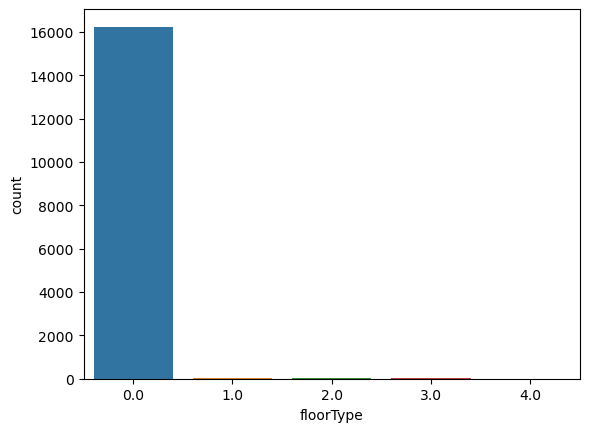

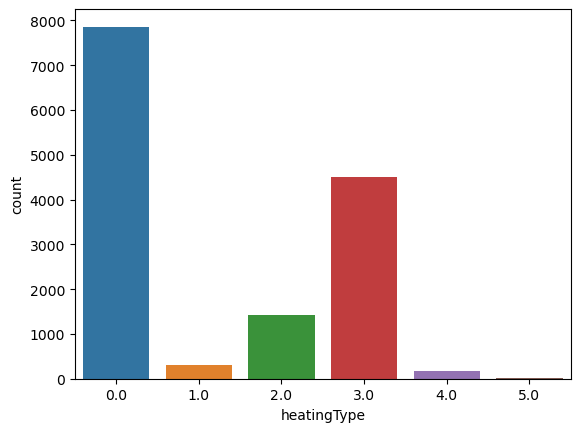

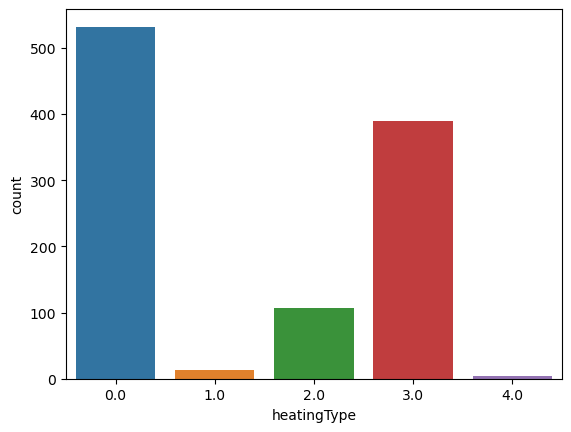

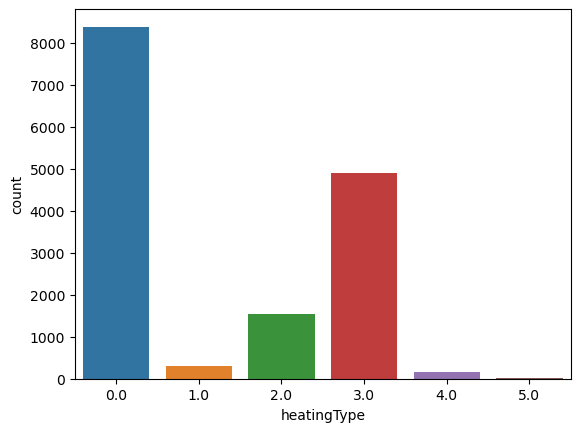

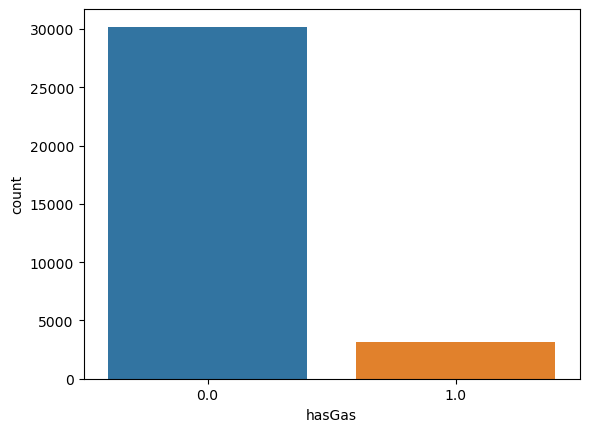

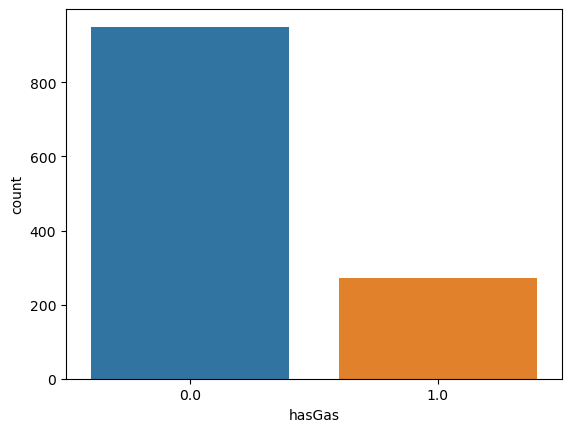

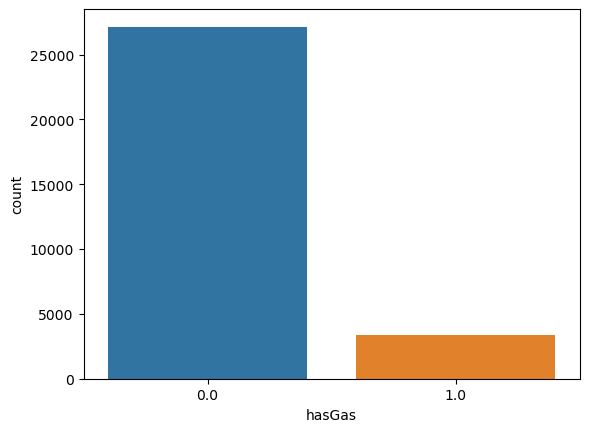

<Figure size 640x480 with 0 Axes>

In [326]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [327]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [328]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2149 non-null   float64
 1   longitude                      2149 non-null   float64
 2   price                          2149 non-null   int64  
 3   house_floors                   2149 non-null   int64  
 4   house_buildYear                2149 non-null   float64
 5   house_ceilingHeight            2149 non-null   float64
 6   house_hasGarbageDisposer       2149 non-null   float64
 7   house_liftsFreight             2149 non-null   float64
 8   house_liftsPassenger           2149 non-null   float64
 9   house_wallType                 2149 non-null   float64
 10  house_areaNonResidential       2149 non-null   float64
 11  house_basementArea             2149 non-null   float64
 12  house_chuteCount               2149 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,45.06359,39.02555,2990000,5,2006.00000,2.72000,0.00000,0.00000,0.00000,1.00000,0.00000,1509.00000,8.00000,1.00000,1.00000,0.00000,10.00000,2.00000,8.00000,1.00000,0.00000,2.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1,30.00000,7.00000,18.00000,3,1.00000,0.00000,0,1.00000,1.00000
1,45.09734,38.97212,5100000,17,2020.00000,2.70000,0.00000,0.00000,2.00000,3.00000,3618.10000,2433.90000,2.00000,1.00000,2.00000,0.00000,1.00000,5.00000,1.00000,0.00000,0.00000,1.00000,3.00000,3588.00000,0.00000,1.00000,1.00000,1,46.00000,12.00000,25.00000,3,1.00000,0.00000,0,0.00000,2.00000
2,45.01388,39.09218,8350000,25,2022.00000,2.72000,0.00000,0.00000,2.00000,4.00000,2884.30000,4099.60000,2.00000,1.00000,6.00000,0.00000,3.00000,5.00000,2.00000,1.00000,0.00000,2.00000,2.00000,3559.60000,12.00000,1.00000,1.00000,2,61.70000,13.60000,32.60000,23,1.00000,0.00000,2,0.00000,0.00000
3,45.09099,39.01075,2300000,17,2022.00000,2.75000,0.00000,1.00000,0.00000,3.00000,1822.30000,3052.70000,2.00000,1.00000,6.00000,0.00000,1.00000,5.00000,1.00000,2.00000,0.00000,5.00000,3.00000,3588.00000,0.00000,1.00000,0.00000,2,40.00000,14.00000,24.00000,9,1.00000,0.00000,1,0.00000,1.00000
4,45.03835,38.92021,3350000,9,2018.00000,2.80000,0.00000,1.00000,1.00000,3.00000,1822.30000,1177.70000,3.00000,1.00000,2.00000,0.00000,1.00000,3.00000,2.00000,0.00000,0.00000,5.00000,2.00000,1205.50000,0.00000,1.00000,0.00000,2,68.00000,25.20000,34.00000,4,1.00000,0.00000,1,0.00000,2.00000


In [329]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [330]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 33324 entries, 0 to 96651
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                33324 non-null  int64  
 1   price_for_metr       33324 non-null  int64  
 2   floor_object         33324 non-null  int64  
 3   total_floors         33324 non-null  int64  
 4   type_of_home         33324 non-null  float64
 5   square_home          33324 non-null  float64
 6   live_square          33324 non-null  float64
 7   kitchen_square       33324 non-null  float64
 8   height_ceiling       33324 non-null  float64
 9   bathroom             33324 non-null  float64
 10  balcony              33324 non-null  float64
 11  repair               33324 non-null  float64
 12  yer_home             33324 non-null  float64
 13  garbage_chute        33324 non-null  float64
 14  type_home            33324 non-null  float64
 15  type_of_overlap      33324 non-null  floa

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1150000,85185,1,6,0.00000,13.50000,8.50000,4.00000,2.70000,1.00000,1.00000,1.00000,2012.00000,0.00000,1.00000,0.00000,3.00000,2.00000,1.00000,2.00000,1.00000,0
1,1200000,21700,2,5,0.00000,55.30000,30.00000,12.00000,2.70000,1.00000,1.00000,0.00000,2022.00000,0.00000,4.00000,0.00000,4.00000,3.00000,0.00000,0.00000,1.00000,2
3,1300000,56522,1,6,0.00000,23.00000,12.80000,6.00000,2.75000,1.00000,1.00000,1.00000,2013.00000,0.00000,1.00000,0.00000,4.00000,0.00000,0.00000,2.00000,1.00000,0
4,1200000,34286,1,1,0.00000,35.00000,22.00000,8.00000,3.60000,1.00000,1.00000,0.00000,1956.00000,0.00000,1.00000,0.00000,1.00000,4.00000,0.00000,2.00000,1.00000,2
5,1300000,65657,2,2,0.00000,19.80000,13.10000,3.00000,4.50000,1.00000,1.00000,1.00000,1917.00000,0.00000,1.00000,0.00000,1.00000,4.00000,1.00000,4.00000,1.00000,1


In [331]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [332]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31476 entries, 0 to 31475
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            31476 non-null  int64  
 1   room_count       31476 non-null  int64  
 2   floor            31476 non-null  int64  
 3   totalFloors      31476 non-null  int64  
 4   area             31476 non-null  float64
 5   kitchenArea      31476 non-null  float64
 6   livingArea       31476 non-null  float64
 7   ceilingHeight    31476 non-null  float64
 8   bathroomCount    31476 non-null  float64
 9   balconyCount     31476 non-null  float64
 10  repairType       31476 non-null  float64
 11  buildYear        31476 non-null  float64
 12  hasGarbageChute  31476 non-null  float64
 13  wallType         31476 non-null  float64
 14  floorType        31476 non-null  float64
 15  entranceCount    31476 non-null  float64
 16  heatingType      31476 non-null  float64
 17  hasGas      

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,2990000,1,3,5,30.00000,7.50000,18.00000,2.50000,0.00000,0.00000,1.00000,2006.00000,0.00000,1.00000,0.00000,8.00000,0.00000,1.00000,6.00000
1,5100000,1,3,17,46.00000,12.00000,18.00000,2.74000,0.00000,0.00000,2.00000,2020.00000,0.00000,3.00000,0.00000,3.00000,3.00000,0.00000,1.00000
2,8350000,2,23,25,61.70000,13.60000,44.40000,2.70000,0.00000,2.00000,0.00000,2022.00000,0.00000,4.00000,0.00000,2.00000,3.00000,0.00000,1.00000
3,2300000,2,9,17,40.00000,14.00000,24.00000,2.80000,1.00000,1.00000,0.00000,2022.00000,0.00000,3.00000,0.00000,1.00000,2.00000,0.00000,1.00000
4,3350000,2,4,9,68.00000,25.20000,34.00000,2.80000,0.00000,1.00000,2.00000,2018.00000,0.00000,3.00000,0.00000,5.00000,3.00000,0.00000,1.00000


In [333]:
combined_imputation['heatingType'].unique()

array([0., 3., 2., 1., 4., 5.])

In [334]:
combined_imputation['repairType'].unique()

array([1., 2., 0., 3., 5., 4., 9.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [335]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [336]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [337]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [338]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1567082687686.1426
MAE:  863834.2454957722
RMSE:  1251831.7329761786
R2:  0.5122892845273899


In [339]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  4011539133594.2544
MAE:  967343.1529134035
RMSE:  2002882.7059002367
R2:  0.8913219951154517


In [340]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  13207160365309.742
MAE:  2143024.175024971
RMSE:  3634165.704162338
R2:  0.6681467009847308


## Случайный лес

In [341]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1252900755321.8289
MAE:  750526.4185130111
RMSE:  1119330.494233865
R2:  0.610069635383168


In [342]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  595442323086.4897
MAE:  72101.97989460721
RMSE:  771649.0932324678
R2:  0.9838686644846761


In [343]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5430199280410.146
MAE:  1202351.0142800198
RMSE:  2330278.7988586575
R2:  0.8635566241591415


## Дерево решений

In [344]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3585978656339.8496
MAE:  1084161.1617100372
RMSE:  1893668.0428047176
R2:  -0.11603569479499787


In [345]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  801584373435.545
MAE:  111892.03024846957
RMSE:  895312.4445887844
R2:  0.978283998348147


In [346]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  12404050866808.436
MAE:  1602568.419939001
RMSE:  3521938.509799459
R2:  0.6883262497428568


## Метод k-ближайших соседей

In [347]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  3859883283751.33
MAE:  1385759.65204461
RMSE:  1964658.5667111042
R2:  -0.2012808594923099


In [348]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  9481097996374.598
MAE:  1213450.8141399592
RMSE:  3079139.1648275005
R2:  0.7431442695567886


In [349]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  9546203292964.215
MAE:  1657186.7696022366
RMSE:  3089693.074233137
R2:  0.7601347323561249


## Перцептрон

In [350]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  6791997836723.095
MAE:  1970731.6045477549
RMSE:  2606146.1656482536
R2:  -1.1138196155607574


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [351]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  21388739237016.004
MAE:  2767136.651783417
RMSE:  4624796.129238131
R2:  0.4205502103148959


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [352]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  32688847450723.52
MAE:  3231222.344283187
RMSE:  5717416.151612853
R2:  0.17863480358557327


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [353]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  1254502695708.193
MAE:  739787.3933550186
RMSE:  1120045.8453599983
R2:  0.6095710761826119


In [354]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  523316023730.8961
MAE:  115508.63826371384
RMSE:  723405.8499424069
R2:  0.9858226632000392


In [355]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5270771033166.087
MAE:  1267111.5980191256
RMSE:  2295815.9841690464
R2:  0.8675625412783983


# Сохранить модель

In [356]:
combined_imputation.to_csv('datasets_18features/combined_krasnodar_18feature.csv', index=False)

In [357]:
import pickle

rf_pkl_file = "models_18features/rf_model_krasnodar_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_krasnodar_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [358]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [359]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5964912803442.067
MAE:  1326383.335635546
RMSE:  2442317.0972341136
R2:  0.8501209997146693


In [360]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5775614747968.792
MAE:  1419044.5932059346
RMSE:  2403250.8707933077
R2:  0.8548774486763238


In [361]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_krasnodar_10feature.csv', index=False)

In [362]:
rf_pkl_file = "models_10features/rf_model_krasnodar_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_krasnodar_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [363]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31476 entries, 0 to 31475
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                31476 non-null  int64  
 1   room_count           31476 non-null  int64  
 2   floor                31476 non-null  int64  
 3   totalFloors          31476 non-null  int64  
 4   area                 31476 non-null  float64
 5   kitchenArea          31476 non-null  float64
 6   livingArea           31476 non-null  float64
 7   ceilingHeight        31476 non-null  float64
 8   bathroomCount        31476 non-null  float64
 9   balconyCount         31476 non-null  float64
 10  buildYear            31476 non-null  float64
 11  entranceCount        31476 non-null  float64
 12  elevatorCount        31476 non-null  float64
 13  repairType_0.0       31476 non-null  bool   
 14  repairType_1.0       31476 non-null  bool   
 15  repairType_2.0       31476 non-null 

In [364]:
combined_ohe.to_csv('datasets_18features_ohe/combined_krasnodar_18feature_ohe.csv', index=False)

In [365]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [366]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5341869022345.717
MAE:  1198459.934237627
RMSE:  2311248.368814074
R2:  0.8657760783590424


In [367]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5101425720855.928
MAE:  1260408.0342483162
RMSE:  2258633.595972558
R2:  0.8718176422242843


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [368]:
rf_pkl_file = "models_18features_ohe/rf_model_krasnodar_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_krasnodar_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [369]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_krasnodar_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31476 entries, 0 to 31475
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            31476 non-null  int64  
 1   room_count       31476 non-null  int64  
 2   floor            31476 non-null  int64  
 3   totalFloors      31476 non-null  int64  
 4   area             31476 non-null  float64
 5   kitchenArea      31476 non-null  float64
 6   livingArea       31476 non-null  float64
 7   ceilingHeight    31476 non-null  float64
 8   buildYear        31476 non-null  float64
 9   repairType_0.0   31476 non-null  bool   
 10  repairType_1.0   31476 non-null  bool   
 11  repairType_2.0   31476 non-null  bool   
 12  repairType_3.0   31476 non-null  bool   
 13  repairType_4.0   31476 non-null  bool   
 14  repairType_5.0   31476 non-null  bool   
 15  repairType_9.0   31476 non-null  bool   
 16  heatingType_0.0  31476 non-null  bool   
 17  heatingType_

In [370]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [371]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5927635523790.91
MAE:  1327727.3167828608
RMSE:  2434673.5969716576
R2:  0.8510576573979548


In [372]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  5602218728171.044
MAE:  1395089.639439573
RMSE:  2366900.658703496
R2:  0.8592343308231584


In [373]:
rf_pkl_file = "models_10features_ohe/rf_model_krasnodar_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_krasnodar_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)